In [1]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import os

sns.set(rc={'figure.figsize':(20,14)})

In [2]:
data_folder = "../data/columncompression20210315/shuffled"

BASELINE_CODEC = "bytepacking_Hyrise_fsba"

cache_path_str = "../data/cache_results_3"
os.system(f"cd ../data && ./categorize_perf_results.sh {cache_path_str}")


os.system(f"p=$(pwd) && cd {data_folder} && python3 $p/benchmark_to_csv.py .")

def fancy_name(benchmark_name):
    a = benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "").replace("_singlethreaded", "").replace("","")[2:]
    return map_benchmark_name(a)

def map_benchmark_name(b):
    return b \
        .replace("compactvector_f", "compactvector_16") \
        .replace("compressionUnencoded", "unencoded_Hyrise") \
        .replace("dictionary", "bytepacking_Hyrise_fsba") \
        .replace("bitpacking_simdcai", "for_SIMDCAI_simd") \
        .replace("bitpacking_turbopfor", "bitpacking_turboPFOR") \
        .replace("simdbp", "simdbp128_Hyrise") \

high_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_high_level.csv")
high_level = high_level.sort_values("benchmark_run_name")
#high_level = high_level[~high_level["benchmark_run_name"].str.match(".*simdbp.*")]
high_level["fancy_name"] = [fancy_name(b) for b in high_level["benchmark_run_name"]]
high_level["codec_name"] = ["_".join(b.split("_")[:len(b.split("_")) - 2]) for b in high_level["fancy_name"]]
high_level["num_clients"] = [int(b.split("_")[len(b.split("_")) - 2]) for b in high_level["fancy_name"]]
high_level = high_level.sort_values("num_clients")
high_level

benchmark_run_name  total_runtime  \
9    ./tpch_bitpacking_compactvector_14_shuffled.json   1.415355e+11   
1   ./tpch_bitpacking_compactvector_f_14_shuffled....   1.394673e+11   
10         ./tpch_bitpacking_simdcai_14_shuffled.json   1.572274e+11   
14     ./tpch_bitpacking_simdcai_seq_14_shuffled.json   1.722959e+11   
8        ./tpch_bitpacking_turbopfor_14_shuffled.json   1.382534e+11   
3    ./tpch_bitpacking_turbopfor_seq_14_shuffled.json   1.535307e+11   
2        ./tpch_compressionUnencoded_14_shuffled.json   1.375624e+11   
5                  ./tpch_dictionary_14_shuffled.json   1.354753e+11   
7    ./tpch_bitpacking_compactvector_28_shuffled.json   2.426735e+11   
15  ./tpch_bitpacking_compactvector_f_28_shuffled....   2.382276e+11   
4          ./tpch_bitpacking_simdcai_28_shuffled.json   2.664518e+11   
0      ./tpch_bitpacking_simdcai_seq_28_shuffled.json   3.029299e+11   
6        ./tpch_bitpacking_turbopfor_28_shuffled.json   2.362562e+11   
13   ./tpch_bitpacking_turbopfor_seq_28_shuffled.json   2.650813e+11   
12       ./tpch_compressionUnencoded_28_shuffled.json   2.370280e+11   
11                 ./tpch_dictionary_28_shuffled.json   2.305019e+11   

    avg_throughput                               fancy_name  \
9         0.097778     bitpacking_compactvector_14_shuffled   
1         0.099042  bitpacking_compactvector_16_14_shuffled   
10        0.087922             for_SIMDCAI_simd_14_shuffled   
14        0.080313         for_SIMDCAI_simd_seq_14_shuffled   
8         0.099925         bitpacking_turboPFOR_14_shuffled   
3         0.090232     bitpacking_turboPFOR_seq_14_shuffled   
2         0.100630             unencoded_Hyrise_14_shuffled   
5         0.102092      bytepacking_Hyrise_fsba_14_shuffled   
7         0.110757     bitpacking_compactvector_28_shuffled   
15        0.112999  bitpacking_compactvector_16_28_shuffled   
4         0.099494             for_SIMDCAI_simd_28_shuffled   
0         0.088694         for_SIMDCAI_simd_seq_28_shuffled   
6         0.113599         bitpacking_turboPFOR_28_shuffled   
13        0.100943     bitpacking_turboPFOR_seq_28_shuffled   
12        0.113791             unencoded_Hyrise_28_shuffled   
11        0.116019      bytepacking_Hyrise_fsba_28_shuffled   

                     codec_name  num_clients  
9      bitpacking_compactvector           14  
1   bitpacking_compactvector_16           14  
10             for_SIMDCAI_simd           14  
14         for_SIMDCAI_simd_seq           14  
8          bitpacking_turboPFOR           14  
3      bitpacking_turboPFOR_seq           14  
2              unencoded_Hyrise           14  
5       bytepacking_Hyrise_fsba           14  
7      bitpacking_compactvector           28  
15  bitpacking_compactvector_16           28  
4              for_SIMDCAI_simd           28  
0          for_SIMDCAI_simd_seq           28  
6          bitpacking_turboPFOR           28  
13     bitpacking_turboPFOR_seq           28  
12             unencoded_Hyrise           28  
11      bytepacking_Hyrise_fsba           28

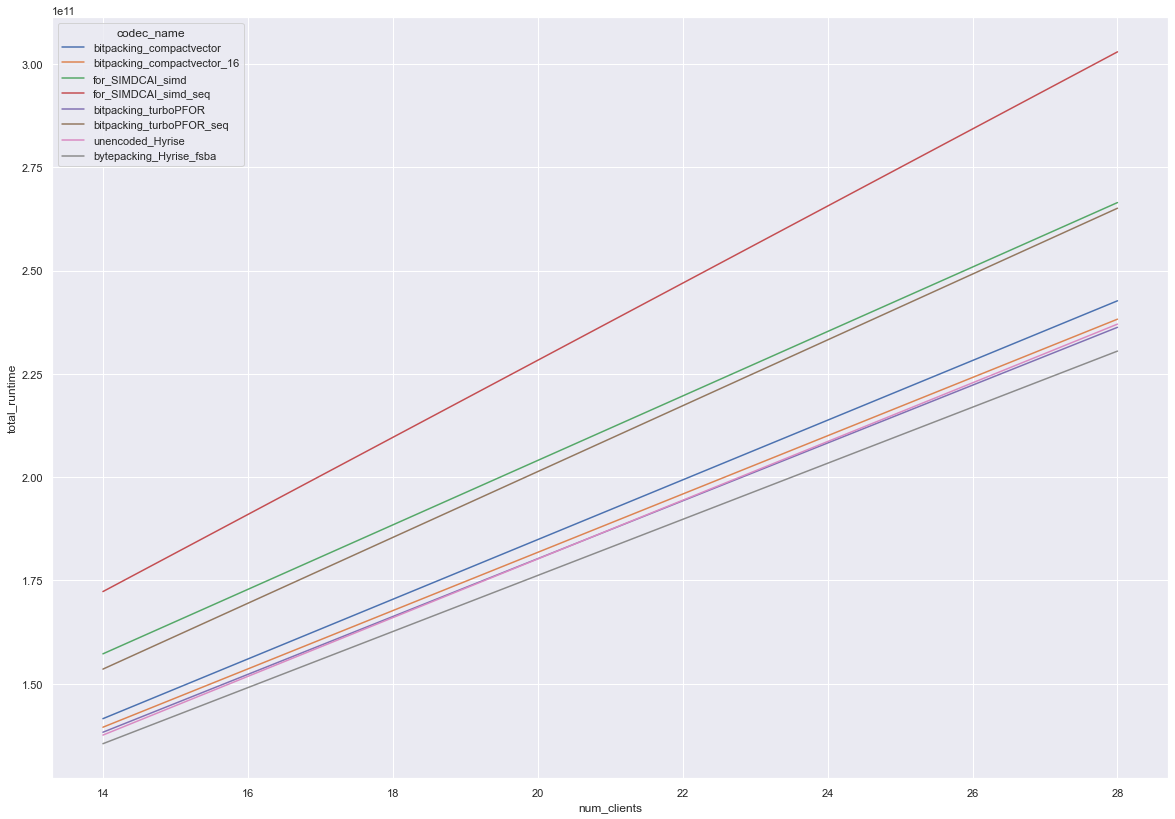

In [3]:

plot = sns.lineplot(data=high_level, x="num_clients", y="total_runtime", hue="codec_name")
plt.savefig(f"visualizations/tpch_multi_compression_high_level_both.svg", format="svg")

#plot_high_level(
 #   high_level[high_level["benchmark_run_name"].str.match(".*LTO.*")],
 #   "tpch_compression_high_level_with_lto")

In [4]:
high_level

benchmark_run_name  total_runtime  \
9    ./tpch_bitpacking_compactvector_14_shuffled.json   1.415355e+11   
1   ./tpch_bitpacking_compactvector_f_14_shuffled....   1.394673e+11   
10         ./tpch_bitpacking_simdcai_14_shuffled.json   1.572274e+11   
14     ./tpch_bitpacking_simdcai_seq_14_shuffled.json   1.722959e+11   
8        ./tpch_bitpacking_turbopfor_14_shuffled.json   1.382534e+11   
3    ./tpch_bitpacking_turbopfor_seq_14_shuffled.json   1.535307e+11   
2        ./tpch_compressionUnencoded_14_shuffled.json   1.375624e+11   
5                  ./tpch_dictionary_14_shuffled.json   1.354753e+11   
7    ./tpch_bitpacking_compactvector_28_shuffled.json   2.426735e+11   
15  ./tpch_bitpacking_compactvector_f_28_shuffled....   2.382276e+11   
4          ./tpch_bitpacking_simdcai_28_shuffled.json   2.664518e+11   
0      ./tpch_bitpacking_simdcai_seq_28_shuffled.json   3.029299e+11   
6        ./tpch_bitpacking_turbopfor_28_shuffled.json   2.362562e+11   
13   ./tpch_bitpacking_turbopfor_seq_28_shuffled.json   2.650813e+11   
12       ./tpch_compressionUnencoded_28_shuffled.json   2.370280e+11   
11                 ./tpch_dictionary_28_shuffled.json   2.305019e+11   

    avg_throughput                               fancy_name  \
9         0.097778     bitpacking_compactvector_14_shuffled   
1         0.099042  bitpacking_compactvector_16_14_shuffled   
10        0.087922             for_SIMDCAI_simd_14_shuffled   
14        0.080313         for_SIMDCAI_simd_seq_14_shuffled   
8         0.099925         bitpacking_turboPFOR_14_shuffled   
3         0.090232     bitpacking_turboPFOR_seq_14_shuffled   
2         0.100630             unencoded_Hyrise_14_shuffled   
5         0.102092      bytepacking_Hyrise_fsba_14_shuffled   
7         0.110757     bitpacking_compactvector_28_shuffled   
15        0.112999  bitpacking_compactvector_16_28_shuffled   
4         0.099494             for_SIMDCAI_simd_28_shuffled   
0         0.088694         for_SIMDCAI_simd_seq_28_shuffled   
6         0.113599         bitpacking_turboPFOR_28_shuffled   
13        0.100943     bitpacking_turboPFOR_seq_28_shuffled   
12        0.113791             unencoded_Hyrise_28_shuffled   
11        0.116019      bytepacking_Hyrise_fsba_28_shuffled   

                     codec_name  num_clients  
9      bitpacking_compactvector           14  
1   bitpacking_compactvector_16           14  
10             for_SIMDCAI_simd           14  
14         for_SIMDCAI_simd_seq           14  
8          bitpacking_turboPFOR           14  
3      bitpacking_turboPFOR_seq           14  
2              unencoded_Hyrise           14  
5       bytepacking_Hyrise_fsba           14  
7      bitpacking_compactvector           28  
15  bitpacking_compactvector_16           28  
4              for_SIMDCAI_simd           28  
0          for_SIMDCAI_simd_seq           28  
6          bitpacking_turboPFOR           28  
13     bitpacking_turboPFOR_seq           28  
12             unencoded_Hyrise           28  
11      bytepacking_Hyrise_fsba           28

<AxesSubplot:xlabel='Library/Codec', ylabel='Total Runtime TPCH SF10 in ms'>

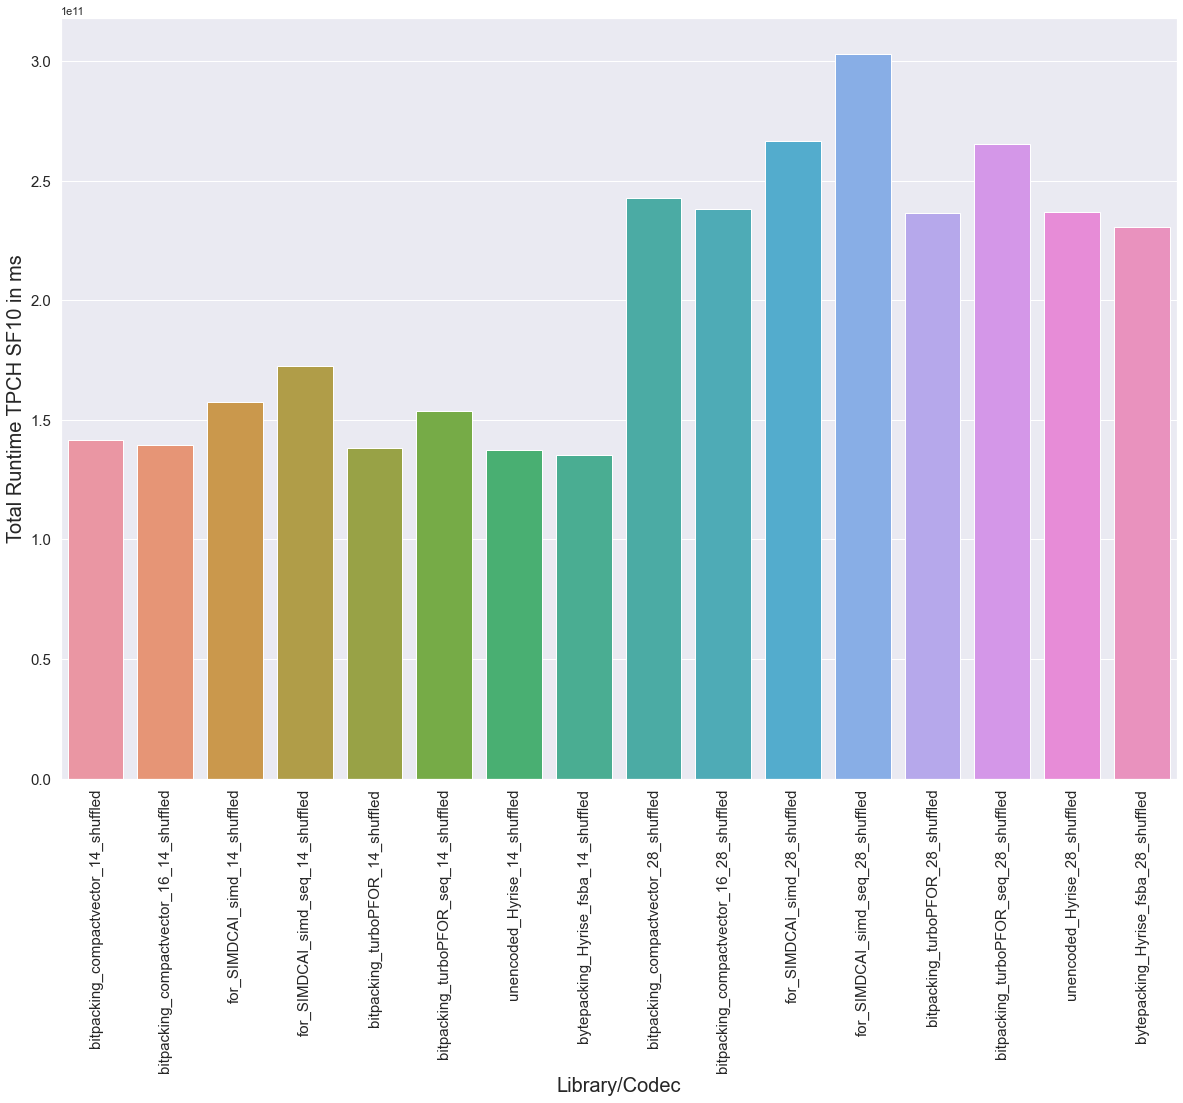

In [5]:
def plot_high_level(d, filename, plot=None):
    plt.tight_layout()
    if plot is None:
        plot = sns.barplot(data=d, x="fancy_name", y="total_runtime")
    # plot.set(ylim=(1.5 * 10**9, 2.05 * 10**9))
    plot.set_xlabel("Library/Codec",fontsize=20)
    plot.set_ylabel("Total Runtime TPCH SF10 in ms",fontsize=20) 
    plot.tick_params(labelsize=15)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

    plt.savefig(f"visualizations/{filename}.svg", format="svg")
    return plot
plot_high_level(
    high_level,
    "tpch_multi_compression_high_level_without_lto")

In [6]:
low_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_low_level.csv")

def fancy_query_name(q):
    return q.replace("TPC-H ", "")

low_level["fancy_name"] = [fancy_name(b) for b in low_level["benchmark_run_name"]]
low_level["query_name"] = [fancy_query_name(b) for b in low_level["query_name"]]
low_level["codec_name"] = ["_".join(b.split("_")[:len(b.split("_")) - 2]) for b in low_level["fancy_name"]]
low_level["num_clients"] = [int(b.split("_")[len(b.split("_")) - 2]) for b in low_level["fancy_name"]]

low_level = low_level.sort_values("query_name")
low_level = low_level[~low_level["benchmark_run_name"].str.match(".*(simdbp).*")]
low_level

benchmark_run_name query_name  \
0        ./tpch_bitpacking_simdcai_seq_28_shuffled.json        10a   
113   ./tpch_bitpacking_compactvector_f_14_shuffled....        10a   
791    ./tpch_bitpacking_compactvector_28_shuffled.json        10a   
1243                 ./tpch_dictionary_28_shuffled.json        10a   
1130         ./tpch_bitpacking_simdcai_14_shuffled.json        10a   
...                                                 ...        ...   
338        ./tpch_compressionUnencoded_14_shuffled.json         9d   
225   ./tpch_bitpacking_compactvector_f_14_shuffled....         9d   
112      ./tpch_bitpacking_simdcai_seq_28_shuffled.json         9d   
1694     ./tpch_bitpacking_simdcai_seq_14_shuffled.json         9d   
1807  ./tpch_bitpacking_compactvector_f_28_shuffled....         9d   

      avg_duration  throughput                               fancy_name  \
0     1.246491e+09    0.088601         for_SIMDCAI_simd_seq_28_shuffled   
113   5.402411e+08    0.098945  bitpacking_compactvector_16_14_shuffled   
791   7.256754e+08    0.110674     bitpacking_compactvector_28_shuffled   
1243  7.546995e+08    0.116044      bytepacking_Hyrise_fsba_28_shuffled   
1130  5.146809e+08    0.087996             for_SIMDCAI_simd_14_shuffled   
...            ...         ...                                      ...   
338   3.056245e+09    0.100792             unencoded_Hyrise_14_shuffled   
225   2.884039e+09    0.098945  bitpacking_compactvector_16_14_shuffled   
112   5.711241e+09    0.088601         for_SIMDCAI_simd_seq_28_shuffled   
1694  3.984926e+09    0.080201         for_SIMDCAI_simd_seq_14_shuffled   
1807  4.793015e+09    0.112751  bitpacking_compactvector_16_28_shuffled   

                       codec_name  num_clients  
0            for_SIMDCAI_simd_seq           28  
113   bitpacking_compactvector_16           14  
791      bitpacking_compactvector           28  
1243      bytepacking_Hyrise_fsba           28  
1130             for_SIMDCAI_simd           14  
...                           ...          ...  
338              unencoded_Hyrise           14  
225   bitpacking_compactvector_16           14  
112          for_SIMDCAI_simd_seq           28  
1694         for_SIMDCAI_simd_seq           14  
1807  bitpacking_compactvector_16           28  

[1808 rows x 7 columns]

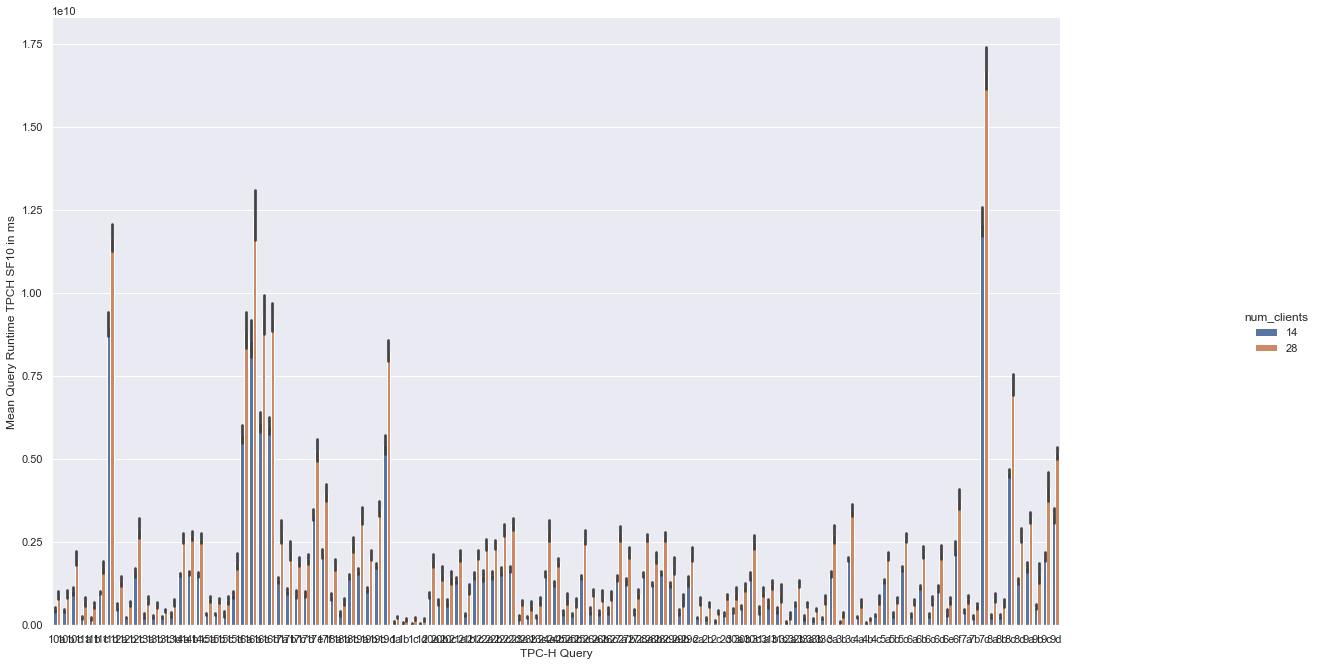

In [7]:
plot = sns.catplot(data=low_level, x="query_name", y="avg_duration", kind="bar", hue="num_clients")
plot.set_axis_labels("TPC-H Query", "Mean Query Runtime TPCH SF10 in ms")
plot.fig.set_size_inches(20 ,10)
plt.savefig(f"visualizations/tpch_multi_compression_low_level_absolute.svg", format="svg")

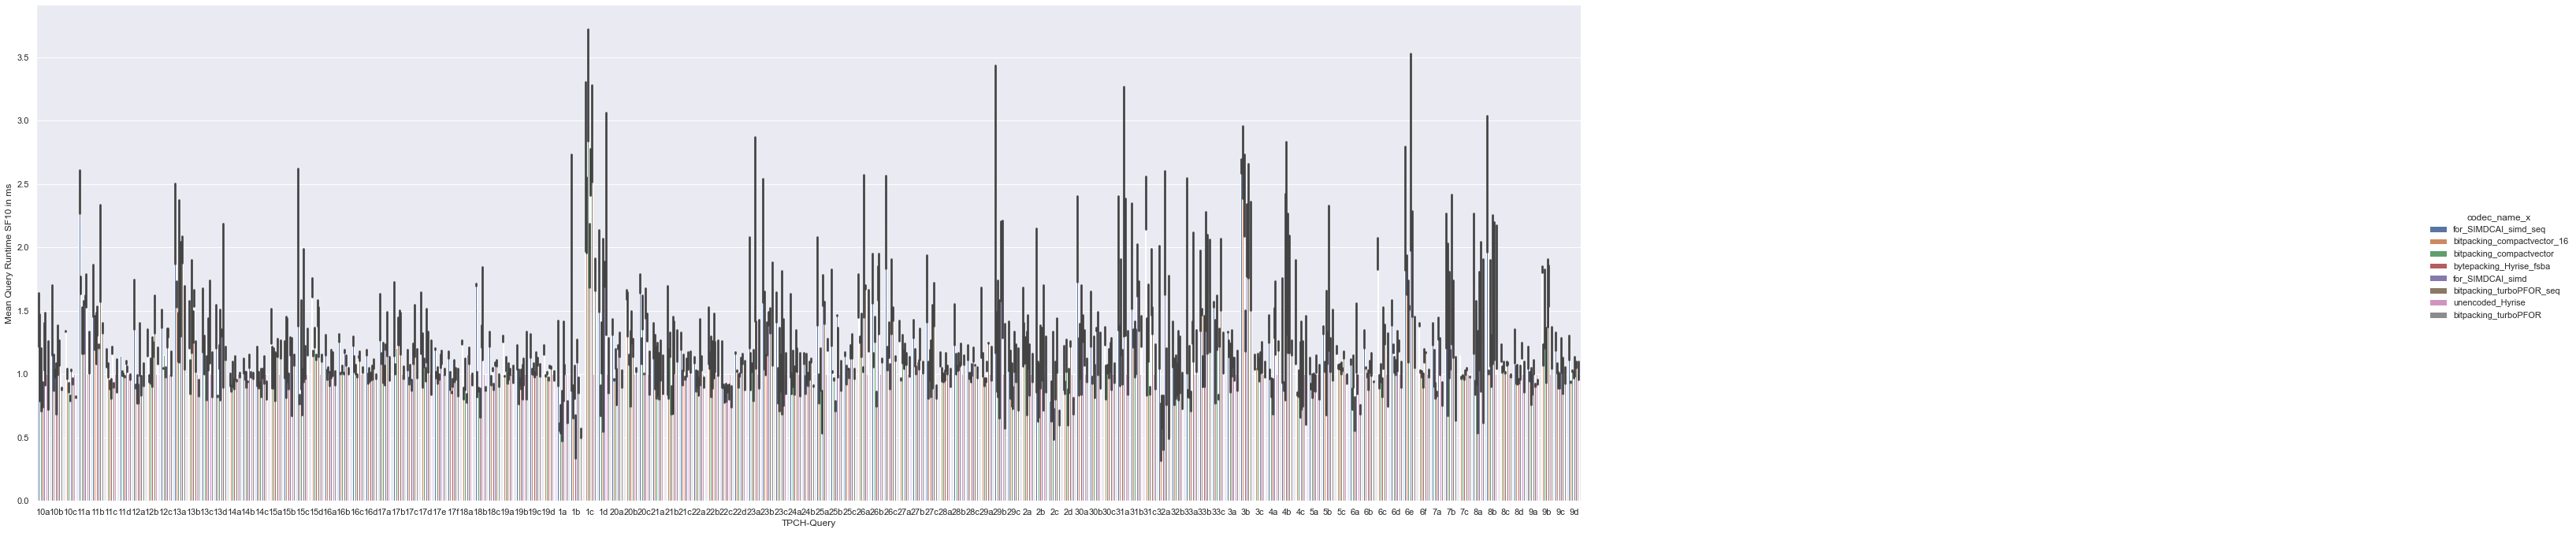

In [8]:
low_level["key"] = low_level["query_name"] + low_level["num_clients"].astype(str)
default_query_durations = low_level[low_level["codec_name"].str.match(".*unencoded.*")]
merged = low_level.merge(default_query_durations, how="left", left_on="key", right_on="key")
merged["duration_percentage"] = merged["avg_duration_x"] / merged["avg_duration_y"]
filtered = merged # merged[~merged["benchmark_run_name_x"].str.match(".*(fsba|turbopfor_seq).*")]
plot = sns.catplot(data=filtered, x="query_name_x", y="duration_percentage", kind="bar", hue="codec_name_x")
plot.set_axis_labels("TPCH-Query", "Mean Query Runtime SF10 in ms")
plot.fig.set_size_inches(50,10)
plt.savefig(f"visualizations/tpch_multi_compression_low_level_percentage.svg", format="svg")
plt.show()


In [9]:
codec_names = filtered["codec_name_x"].unique()
codec_names.sort()
excluded = ["for_SIMDCAI_simd", "for_SIMDCAI_simd_seq", "bitpacking_turboPFOR_seq"]
codec_names = [c for c in codec_names if not c in excluded]
codec_names

['bitpacking_compactvector',
 'bitpacking_compactvector_16',
 'bitpacking_turboPFOR',
 'bytepacking_Hyrise_fsba',
 'unencoded_Hyrise']

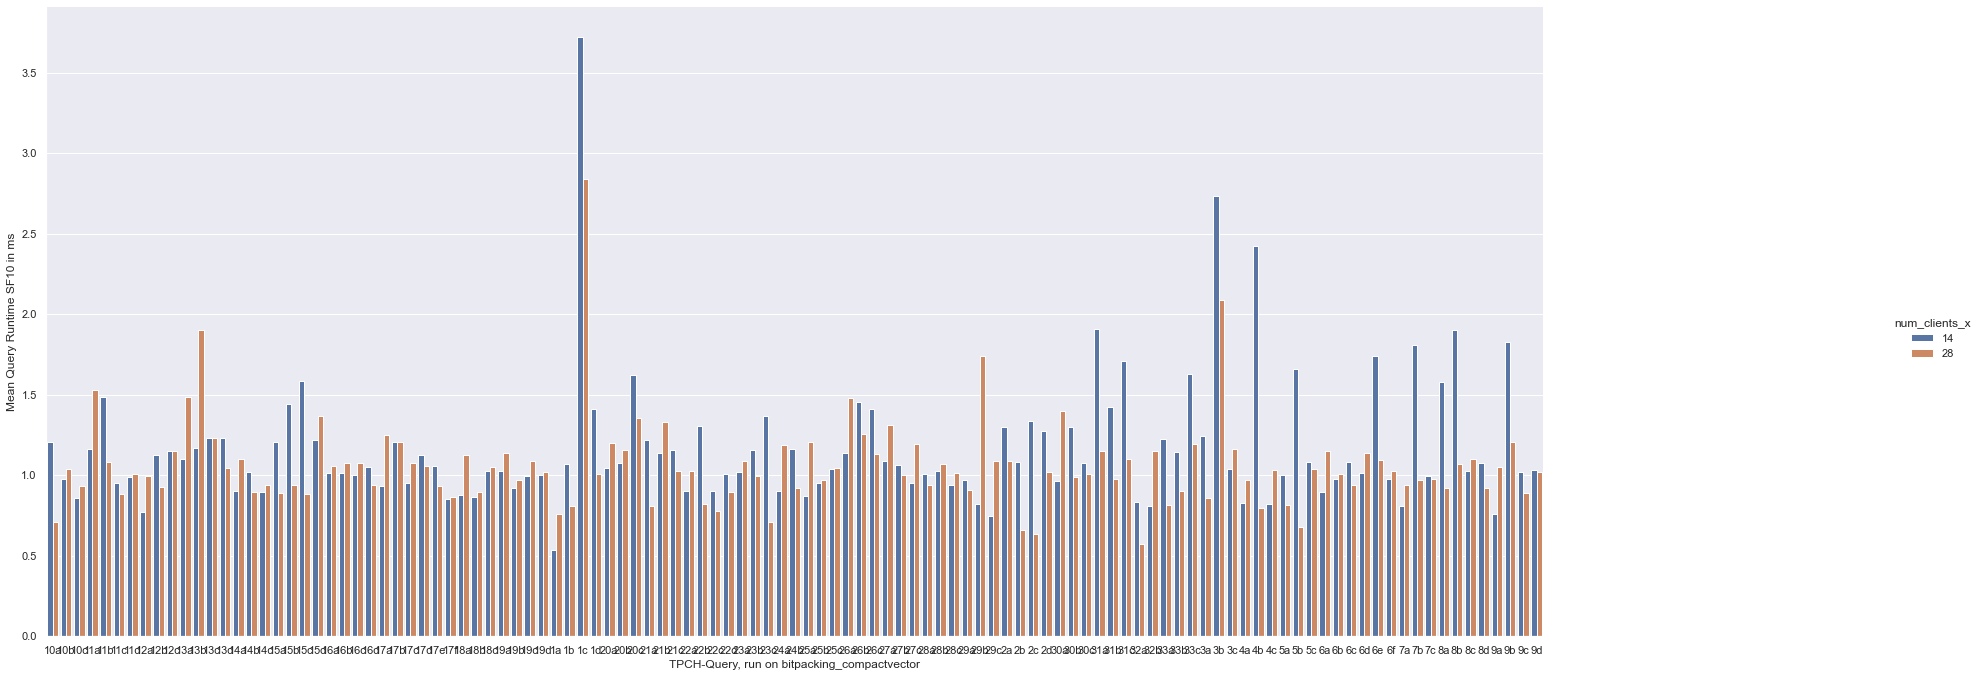

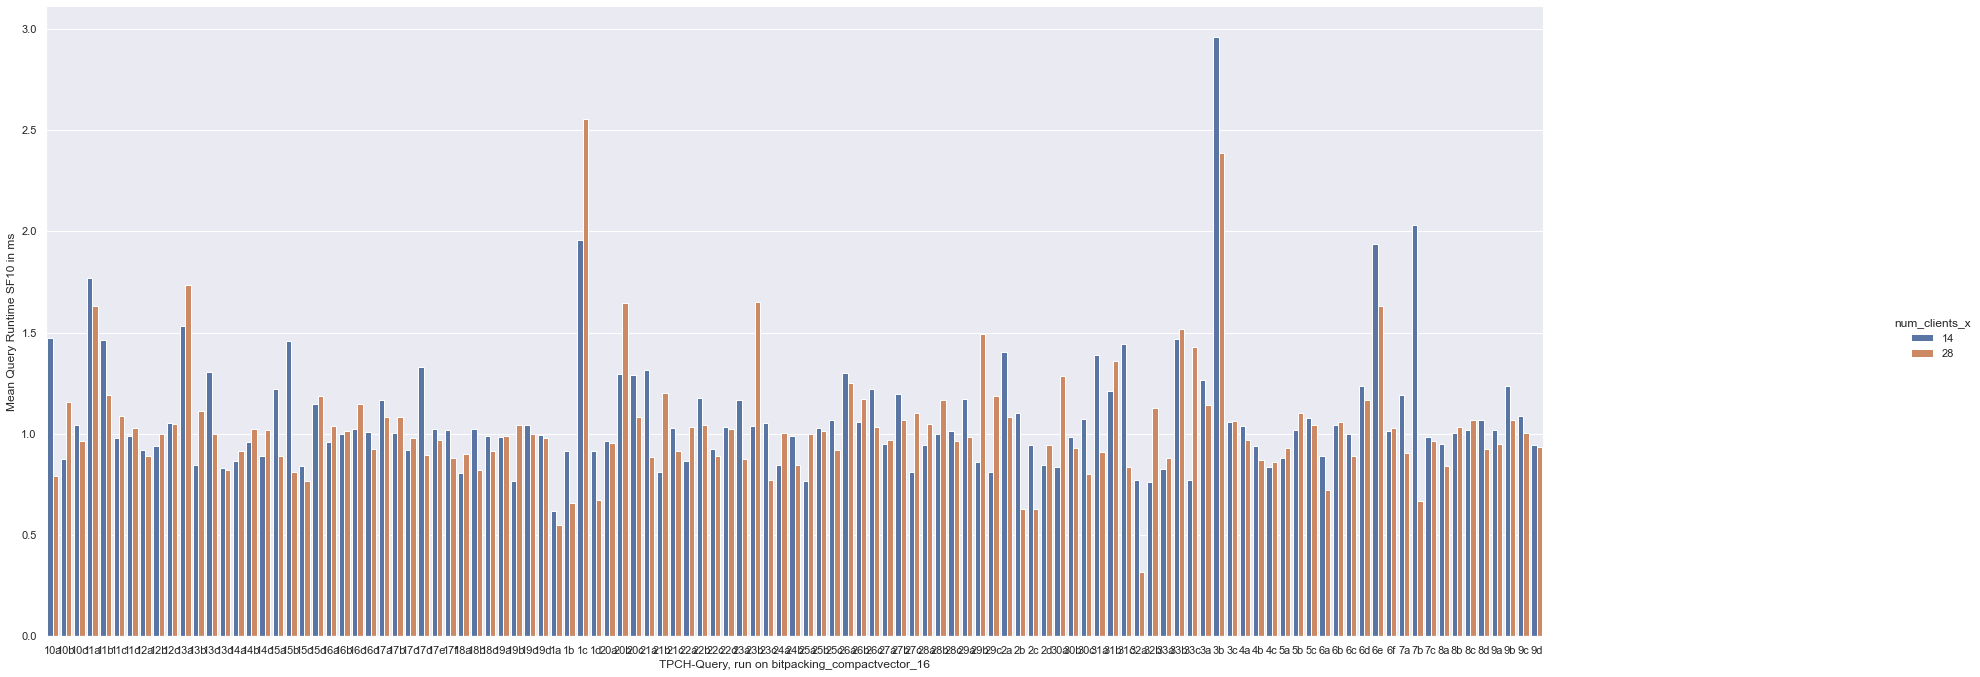

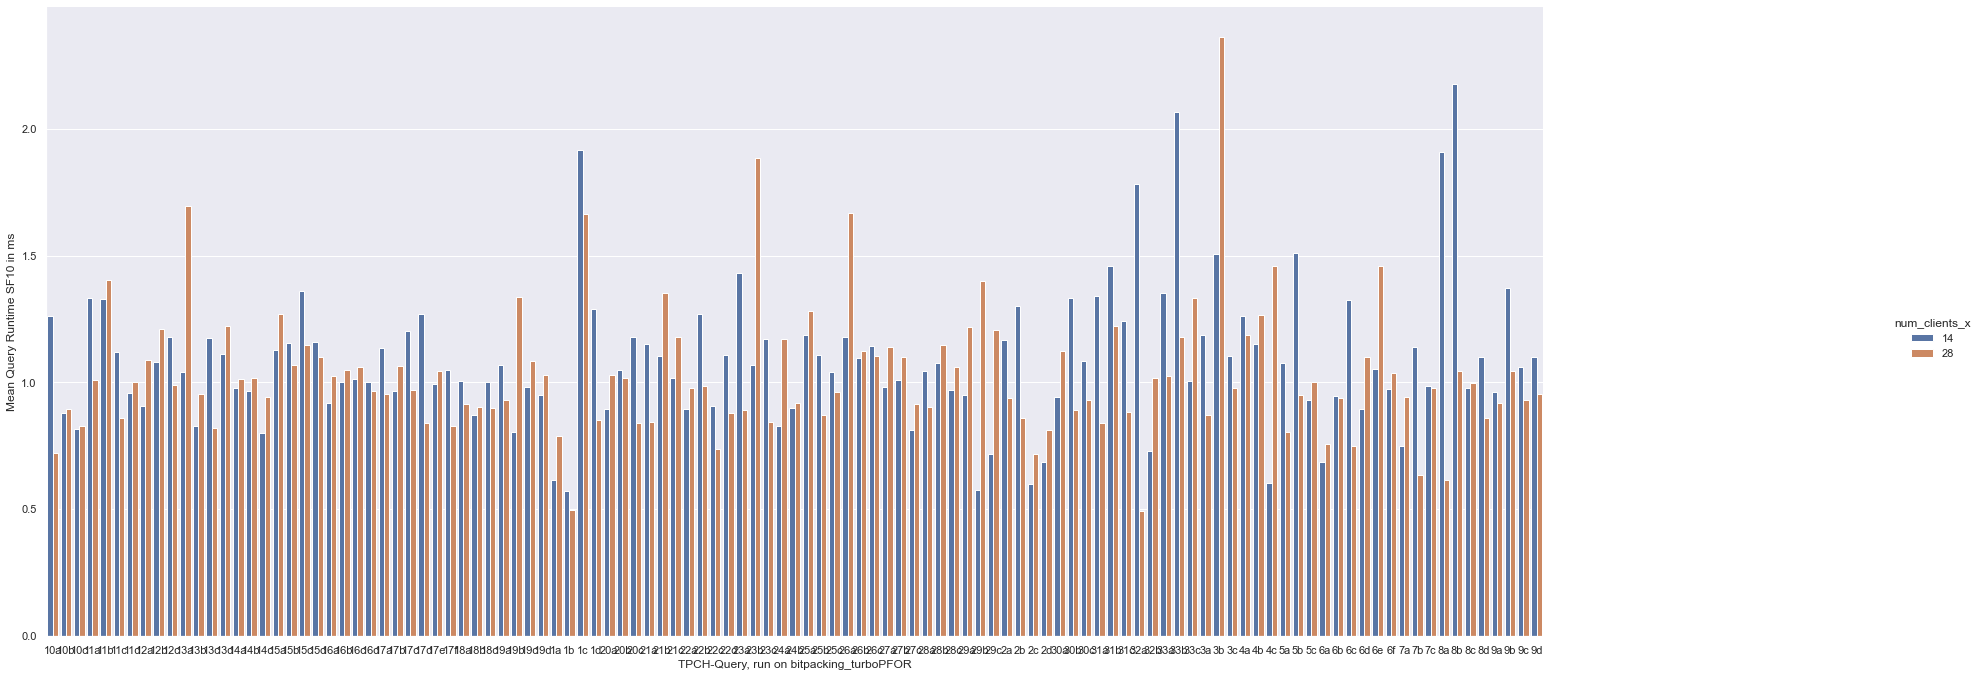

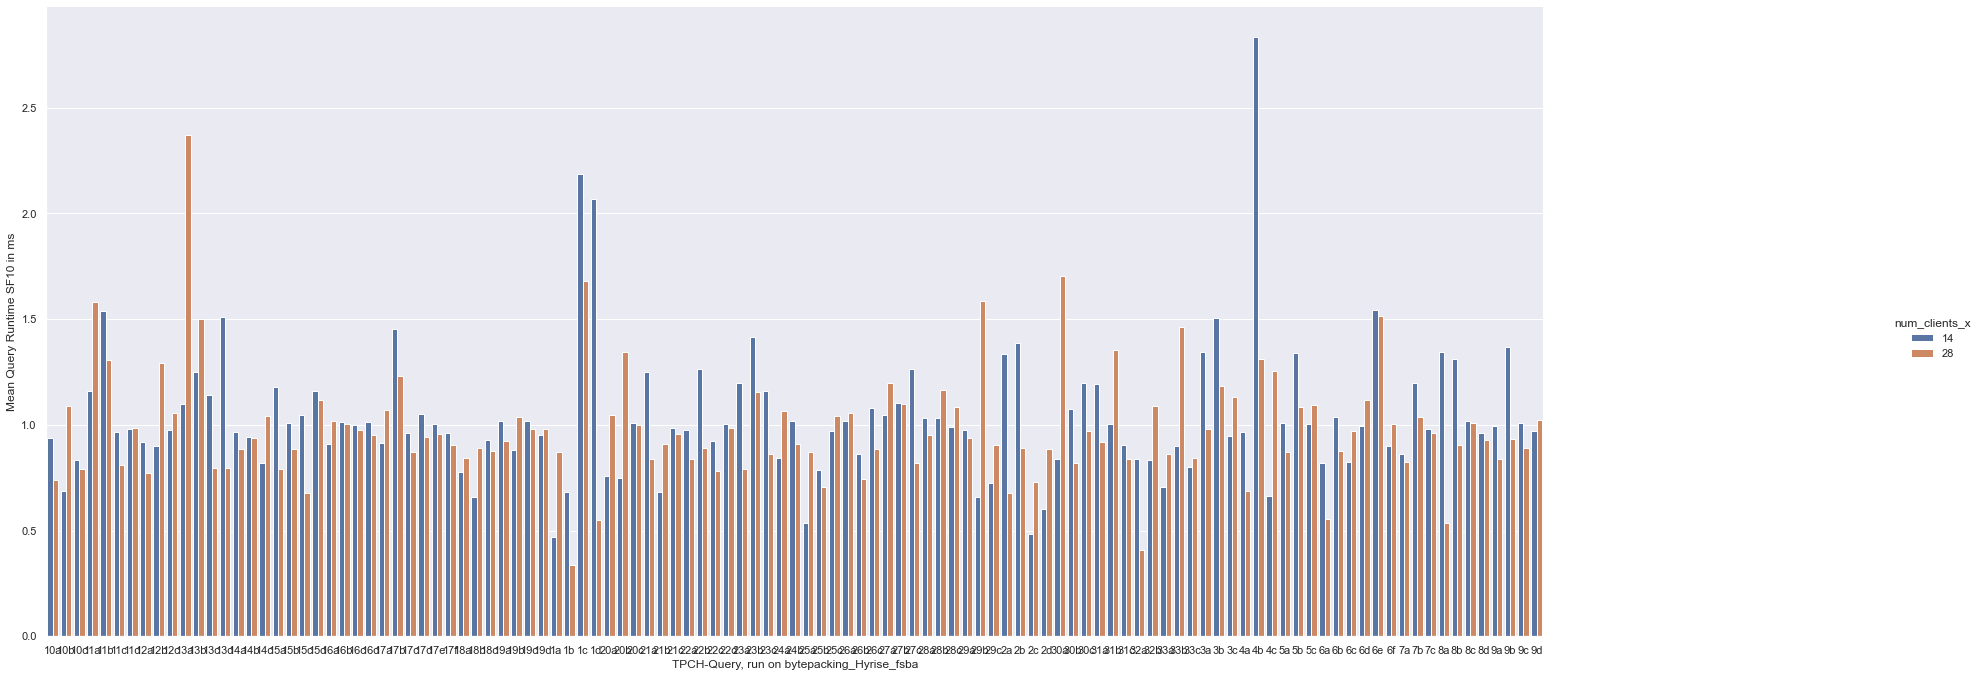

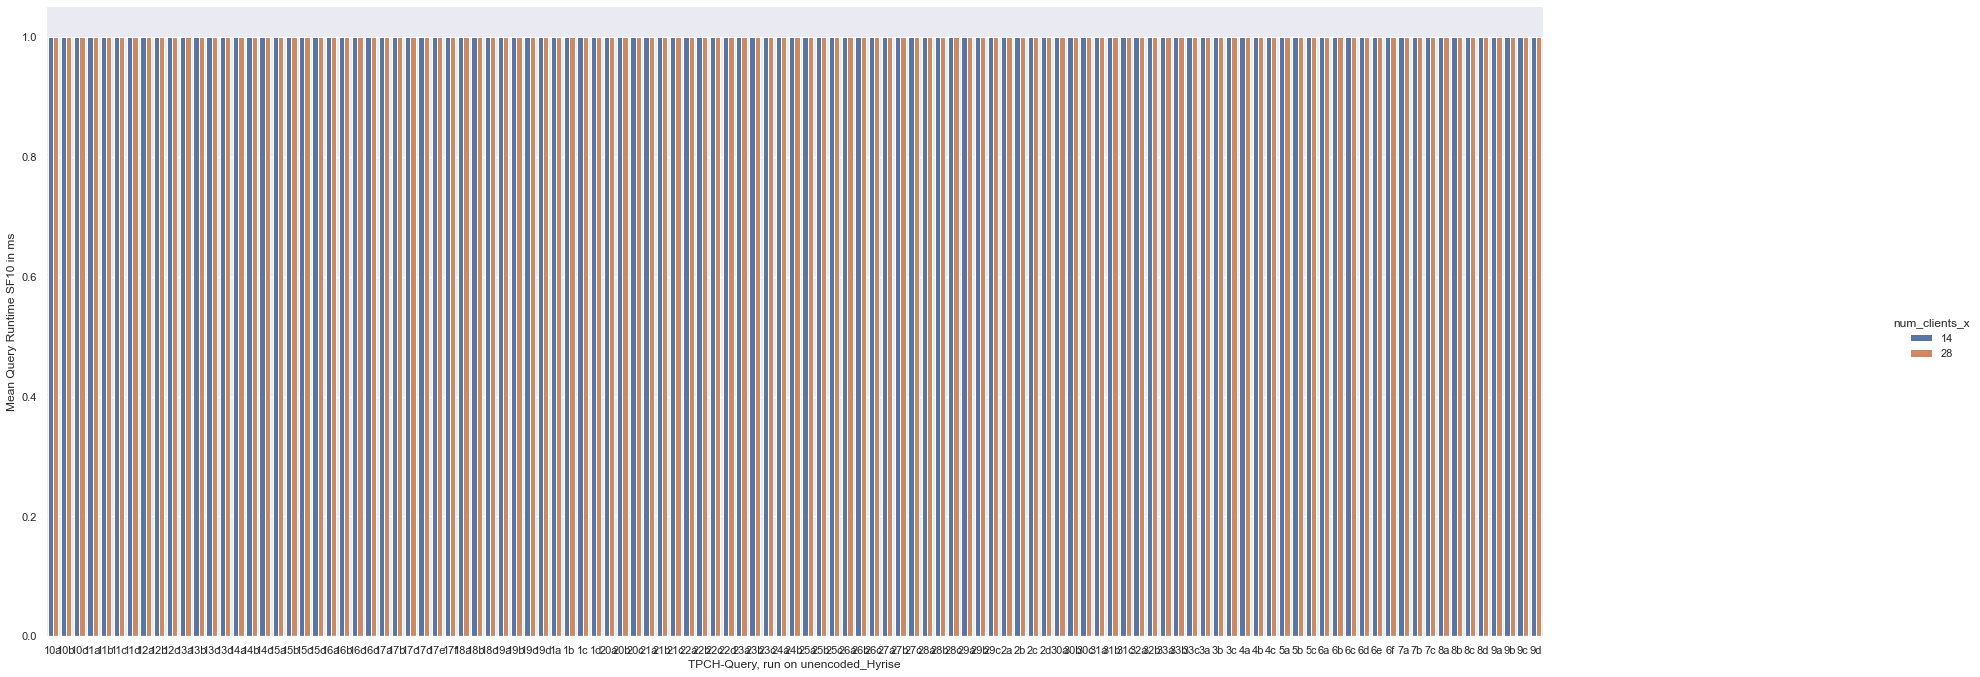

In [10]:
for n in codec_names:
    f = filtered[filtered["codec_name_x"].str.endswith(f"{n}")]
    plot = sns.catplot(data=f, x="query_name_x", y="duration_percentage", kind="bar", hue="num_clients_x")
    plot.set_axis_labels("TPCH-Query, run on " + n, "Mean Query Runtime SF10 in ms")
    plot.fig.set_size_inches(30,10)
    plt.savefig(f"visualizations/tpch_multi_compression_low_level_percentage.svg", format="svg")
    plt.show()

### weird, why are both of our schemes bitpacking_turbopfor and bitpacking_compactvector worde in queries 2, 17 and better in query 6? what is going on?

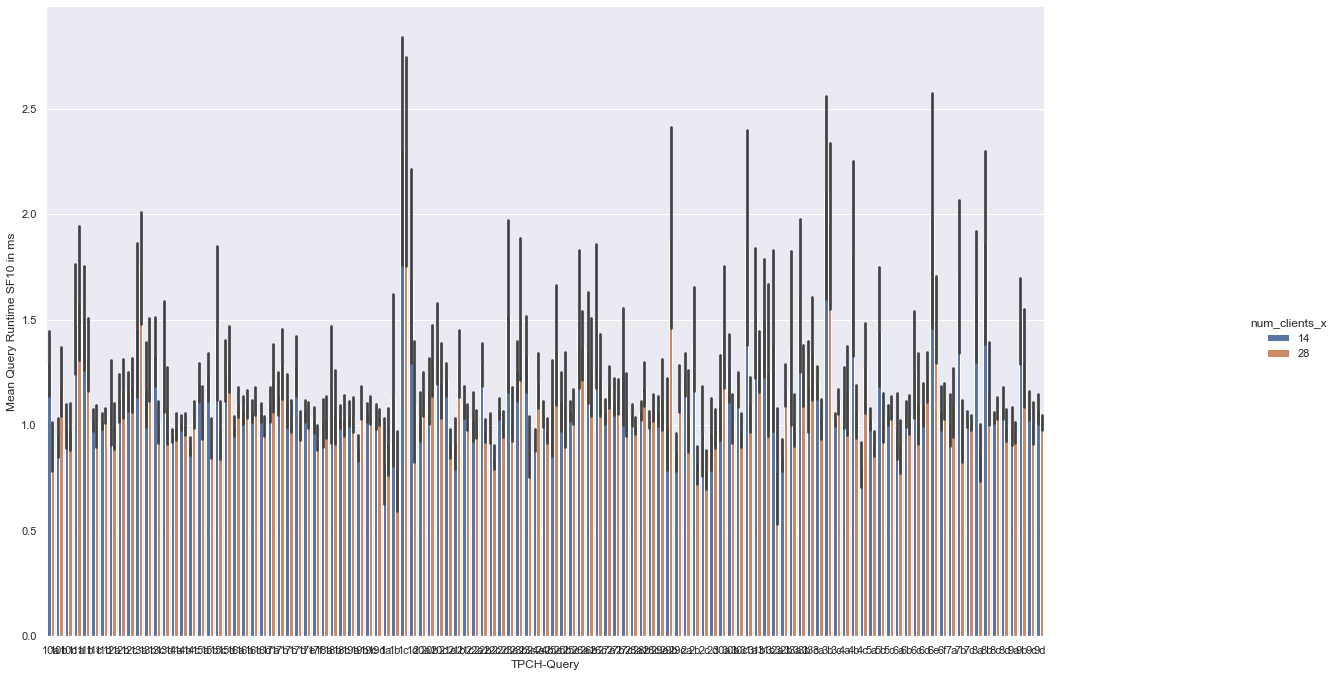

In [11]:

plot = sns.catplot(data=filtered, x="query_name_x", y="duration_percentage", kind="bar", hue="num_clients_x")
plot.set_axis_labels("TPCH-Query", "Mean Query Runtime SF10 in ms")
plot.fig.set_size_inches(20,10)
plt.savefig(f"visualizations/tpch_multi_compression_low_level_percentage.svg", format="svg")

In [12]:
high_level

benchmark_run_name  total_runtime  \
9    ./tpch_bitpacking_compactvector_14_shuffled.json   1.415355e+11   
1   ./tpch_bitpacking_compactvector_f_14_shuffled....   1.394673e+11   
10         ./tpch_bitpacking_simdcai_14_shuffled.json   1.572274e+11   
14     ./tpch_bitpacking_simdcai_seq_14_shuffled.json   1.722959e+11   
8        ./tpch_bitpacking_turbopfor_14_shuffled.json   1.382534e+11   
3    ./tpch_bitpacking_turbopfor_seq_14_shuffled.json   1.535307e+11   
2        ./tpch_compressionUnencoded_14_shuffled.json   1.375624e+11   
5                  ./tpch_dictionary_14_shuffled.json   1.354753e+11   
7    ./tpch_bitpacking_compactvector_28_shuffled.json   2.426735e+11   
15  ./tpch_bitpacking_compactvector_f_28_shuffled....   2.382276e+11   
4          ./tpch_bitpacking_simdcai_28_shuffled.json   2.664518e+11   
0      ./tpch_bitpacking_simdcai_seq_28_shuffled.json   3.029299e+11   
6        ./tpch_bitpacking_turbopfor_28_shuffled.json   2.362562e+11   
13   ./tpch_bitpacking_turbopfor_seq_28_shuffled.json   2.650813e+11   
12       ./tpch_compressionUnencoded_28_shuffled.json   2.370280e+11   
11                 ./tpch_dictionary_28_shuffled.json   2.305019e+11   

    avg_throughput                               fancy_name  \
9         0.097778     bitpacking_compactvector_14_shuffled   
1         0.099042  bitpacking_compactvector_16_14_shuffled   
10        0.087922             for_SIMDCAI_simd_14_shuffled   
14        0.080313         for_SIMDCAI_simd_seq_14_shuffled   
8         0.099925         bitpacking_turboPFOR_14_shuffled   
3         0.090232     bitpacking_turboPFOR_seq_14_shuffled   
2         0.100630             unencoded_Hyrise_14_shuffled   
5         0.102092      bytepacking_Hyrise_fsba_14_shuffled   
7         0.110757     bitpacking_compactvector_28_shuffled   
15        0.112999  bitpacking_compactvector_16_28_shuffled   
4         0.099494             for_SIMDCAI_simd_28_shuffled   
0         0.088694         for_SIMDCAI_simd_seq_28_shuffled   
6         0.113599         bitpacking_turboPFOR_28_shuffled   
13        0.100943     bitpacking_turboPFOR_seq_28_shuffled   
12        0.113791             unencoded_Hyrise_28_shuffled   
11        0.116019      bytepacking_Hyrise_fsba_28_shuffled   

                     codec_name  num_clients  
9      bitpacking_compactvector           14  
1   bitpacking_compactvector_16           14  
10             for_SIMDCAI_simd           14  
14         for_SIMDCAI_simd_seq           14  
8          bitpacking_turboPFOR           14  
3      bitpacking_turboPFOR_seq           14  
2              unencoded_Hyrise           14  
5       bytepacking_Hyrise_fsba           14  
7      bitpacking_compactvector           28  
15  bitpacking_compactvector_16           28  
4              for_SIMDCAI_simd           28  
0          for_SIMDCAI_simd_seq           28  
6          bitpacking_turboPFOR           28  
13     bitpacking_turboPFOR_seq           28  
12             unencoded_Hyrise           28  
11      bytepacking_Hyrise_fsba           28

In [13]:
multi_tpch_data_folder = "../data/columncompression20210226/shuffled"
multi_tpcds_data_folder = "../data/columncompression20210310/shuffled"
multi_job_data_folder = "../data/columncompression20210315/shuffled"

os.system(f"p=$(pwd) && cd {data_folder} && python3 $p/benchmark_to_csv.py .")

def fancy_name(benchmark_name):
    a = benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "").replace("_singlethreaded", "").replace("","")[2:]
    return map_benchmark_name(a)

def map_benchmark_name(b):
    return b \
        .replace("compactvector_f", "compactvector_16") \
        .replace("compressionUnencoded", "unencoded_Hyrise") \
        .replace("dictionary", "bytepacking_Hyrise_fsba") \
        .replace("bitpacking_simdcai", "for_SIMDCAI_simd") \
        .replace("bitpacking_turbopfor", "bitpacking_turboPFOR") \
        .replace("simdbp", "simdbp128_Hyrise") \

def get_high_level_multi(data_folder, name):
    os.system(f"p=$(pwd) && cd {data_folder} && python3 $p/benchmark_to_csv.py .")

    high_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_high_level.csv")
    high_level = high_level.sort_values("benchmark_run_name")
    #high_level = high_level[~high_level["benchmark_run_name"].str.match(".*simdbp.*")]
    high_level["fancy_name"] = [fancy_name(b) for b in high_level["benchmark_run_name"]]
    high_level["codec_name"] = ["_".join(b.split("_")[:len(b.split("_")) - 2]) for b in high_level["fancy_name"]]
    high_level["num_clients"] = [int(b.split("_")[len(b.split("_")) - 2]) for b in high_level["fancy_name"]]
    high_level = high_level.sort_values("num_clients")

    high_level["benchmark"] = name

    base = high_level[high_level["fancy_name"] == f"{BASELINE_CODEC}_28_shuffled"]["total_runtime"].values[0]
    high_level["relative_runtime"] = high_level["total_runtime"] / base

    all_h = []
    for n in high_level.num_clients.unique():
        h_n = high_level[high_level.num_clients == n]
        base = h_n[h_n["codec_name"] == BASELINE_CODEC]["total_runtime"].values[0]
        h_n["relative_runtime"] = h_n["total_runtime"] / base
        all_h.append(h_n)

    a = pd.concat(all_h)

    a["total_throughput"] = a.avg_throughput * a.num_clients


    b = pd.DataFrame({"codec": a.codec_name,"throughput": a.avg_throughput, "total_runtime": a.total_runtime, "benchmark": a.benchmark, "num_clients": a.num_clients, "relative_runtime": a.relative_runtime, "total_throughput": a.total_throughput})
    

    return b

tpch_cache_multi = get_high_level_multi(f"{cache_path_str}/tpch_shuffled", "TPC-DS")
tpch_cache_multi

codec  throughput  total_runtime benchmark  \
2     bitpacking_compactvector    0.726632   1.995697e+10    TPC-DS   
5  bitpacking_compactvector_16    0.746845   2.004067e+10    TPC-DS   
0             for_SIMDCAI_simd    0.650963   2.308354e+10    TPC-DS   
1         bitpacking_turboPFOR    0.759741   1.940204e+10    TPC-DS   
4             unencoded_Hyrise    0.713652   2.082751e+10    TPC-DS   
3      bytepacking_Hyrise_fsba    0.774415   1.901286e+10    TPC-DS   

   num_clients  relative_runtime  total_throughput  
2           28          1.049656         20.345704  
5           28          1.054058         20.911660  
0           28          1.214101         18.226976  
1           28          1.020469         21.272749  
4           28          1.095443         19.982255  
3           28          1.000000         21.683627

In [14]:
high_level_multi_tpch = get_high_level_multi(multi_tpch_data_folder, "TPC-H")
high_level_multi_tpcds = get_high_level_multi(multi_tpcds_data_folder, "TPC-DS")
high_level_multi_job = get_high_level_multi(multi_job_data_folder, "JOB")
multi_benchmarks = pd.concat([high_level_multi_tpch, high_level_multi_tpcds, high_level_multi_job])

multi_benchmarks

<ipython-input-13-666fa7005399>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_n["relative_runtime"] = h_n["total_runtime"] / base
<ipython-input-13-666fa7005399>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_n["relative_runtime"] = h_n["total_runtime"] / base
<ipython-input-13-666fa7005399>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

codec  throughput  total_runtime benchmark  \
9      bitpacking_compactvector    0.327872   4.239725e+10     TPC-H   
1   bitpacking_compactvector_16    0.330039   4.217271e+10     TPC-H   
10             for_SIMDCAI_simd    0.283073   4.908535e+10     TPC-H   
14         for_SIMDCAI_simd_seq    0.259306   5.362156e+10     TPC-H   
8          bitpacking_turboPFOR    0.329466   4.217997e+10     TPC-H   
3      bitpacking_turboPFOR_seq    0.302277   4.596888e+10     TPC-H   
2              unencoded_Hyrise    0.331588   4.190287e+10     TPC-H   
5       bytepacking_Hyrise_fsba    0.341751   4.069727e+10     TPC-H   
7      bitpacking_compactvector    0.450786   6.154712e+10     TPC-H   
15  bitpacking_compactvector_16    0.455742   6.095900e+10     TPC-H   
4              for_SIMDCAI_simd    0.398147   6.969413e+10     TPC-H   
0          for_SIMDCAI_simd_seq    0.322921   8.600073e+10     TPC-H   
6          bitpacking_turboPFOR    0.453813   6.122328e+10     TPC-H   
13     bitpacking_turboPFOR_seq    0.396007   7.009173e+10     TPC-H   
12             unencoded_Hyrise    0.448091   6.200093e+10     TPC-H   
11      bytepacking_Hyrise_fsba    0.466402   5.952697e+10     TPC-H   
9      bitpacking_compactvector    0.385741   3.595030e+10    TPC-DS   
1   bitpacking_compactvector_16    0.395477   3.510810e+10    TPC-DS   
10             for_SIMDCAI_simd    0.337532   4.105248e+10    TPC-DS   
14         for_SIMDCAI_simd_seq    0.217652   6.320344e+10    TPC-DS   
8          bitpacking_turboPFOR    0.400145   3.469481e+10    TPC-DS   
3      bitpacking_turboPFOR_seq    0.306712   4.507971e+10    TPC-DS   
2              unencoded_Hyrise    0.401107   3.459018e+10    TPC-DS   
5       bytepacking_Hyrise_fsba    0.407077   3.408582e+10    TPC-DS   
7      bitpacking_compactvector    0.538483   5.144088e+10    TPC-DS   
15  bitpacking_compactvector_16    0.547803   5.063229e+10    TPC-DS   
4              for_SIMDCAI_simd    0.460566   5.986166e+10    TPC-DS   
0          for_SIMDCAI_simd_seq    0.244518   1.115894e+11    TPC-DS   
6          bitpacking_turboPFOR    0.560060   4.956408e+10    TPC-DS   
13     bitpacking_turboPFOR_seq    0.387061   7.112392e+10    TPC-DS   
12             unencoded_Hyrise    0.555491   4.996506e+10    TPC-DS   
11      bytepacking_Hyrise_fsba    0.568195   4.884397e+10    TPC-DS   
9      bitpacking_compactvector    0.097778   1.415355e+11       JOB   
1   bitpacking_compactvector_16    0.099042   1.394673e+11       JOB   
10             for_SIMDCAI_simd    0.087922   1.572274e+11       JOB   
14         for_SIMDCAI_simd_seq    0.080313   1.722959e+11       JOB   
8          bitpacking_turboPFOR    0.099925   1.382534e+11       JOB   
3      bitpacking_turboPFOR_seq    0.090232   1.535307e+11       JOB   
2              unencoded_Hyrise    0.100630   1.375624e+11       JOB   
5       bytepacking_Hyrise_fsba    0.102092   1.354753e+11       JOB   
7      bitpacking_compactvector    0.110757   2.426735e+11       JOB   
15  bitpacking_compactvector_16    0.112999   2.382276e+11       JOB   
4              for_SIMDCAI_simd    0.099494   2.664518e+11       JOB   
0          for_SIMDCAI_simd_seq    0.088694   3.029299e+11       JOB   
6          bitpacking_turboPFOR    0.113599   2.362562e+11       JOB   
13     bitpacking_turboPFOR_seq    0.100943   2.650813e+11       JOB   
12             unencoded_Hyrise    0.113791   2.370280e+11       JOB   
11      bytepacking_Hyrise_fsba    0.116019   2.305019e+11       JOB   

    num_clients  relative_runtime  total_throughput  
9            14          1.041771          4.590212  
1            14          1.036254          4.620549  
10           14          1.206109          3.963022  
14           14          1.317571          3.630287  
8            14          1.036432          4.612522  
3            14          1.129532          4.231885  
2            14          1.029624          4.642231  
5            14          1.000000          4.784518  
7          

In [15]:
#tpch_cache_multi = get_high_level_multi(f"{cache_path_str}/tpch_shuffled", "TPC-DS")



In [16]:
def fancy_name(benchmark_name):
    a = benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "").replace("_singlethreaded", "")[2:]
    return map_benchmark_name(a)

def map_benchmark_name(b):
    return b \
        .replace("compactvector_f", "compactvector_16") \
        .replace("compressionUnencoded", "unencoded_Hyrise") \
        .replace("dictionary", "bytepacking_Hyrise_fsba") \
        .replace("bitpacking_simdcai", "for_SIMDCAI_simd") \
        .replace("bitpacking_turbopfor", "bitpacking_turboPFOR") \
        .replace("simdbp", "simdbp128_Hyrise") \

def get_high_level(data_folder):
    high_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_high_level.csv")
    high_level = high_level.sort_values("benchmark_run_name")
    # high_level = high_level[~high_level["benchmark_run_name"].str.match(".*simdbp.*")]
    high_level["fancy_name"] = [fancy_name(b) for b in high_level["benchmark_run_name"]]
    high_level["LTO"] = high_level["benchmark_run_name"].str.match(".*LTO.*")
    return high_level

def load_table(path: Path) -> DataFrame:
    all_entries: List[List[str]] = []
    av_dict_entries: List[List[int]] = []
    column_names: List[str] = []
    types: List[str] = []
    with path.open() as file:
        table_starts: bool = False
        for line in file:
            if not table_starts and "attribute_vector_size" in line:
                e = [entry for entry in line.split(",") if entry != "" and entry != "\n"]
                av_dict_entries.append([int(e[1]), int(e[3])])
            if len(column_names) != 0 and table_starts and not '|' in line:
                break
            if not '|' in line:
                continue
            if len(column_names) == 0:
                column_names = [entry.replace(" ", "")
                                for entry in line.split("|") if entry != "" and entry != "\n"]
                continue
            if len(types) == 0:
                types =  [entry.replace(" ", "")
                          for entry in line.split("|") if entry != "" and entry != "\n"]
                continue
            if "<ValueS>" in line:
                table_starts = True
                continue
            if not table_starts:
                continue
            new_entry: List[str] = [entry.replace(" ", "")
                                    for entry in line.split("|") if entry != "" and entry != "\n"]
            all_entries.append(new_entry)
    as_type: Dict[str, str] = {column_names[i]:types[i] for i in range(0, len(column_names))}

    entries = [a + b for a,b, in zip(all_entries, av_dict_entries)]
    column_names = column_names + ["attribute_vector_size", "dict_size"]
    df = DataFrame(data=entries, columns=column_names).astype(as_type)

    df["dict_size"] = [1 if d == 0 else d for d in df["dict_size"]]
    df["duplication_factor"] = df["attribute_vector_size"] / df["dict_size"]

    df = df.astype({'duplication_factor': 'int32'})

    return df

def fancy_name(benchmark_name):
    a = benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "").replace("_singlethreaded", "").replace("sizes_","").replace(".txt", "")
    return map_benchmark_name(a)

def map_benchmark_name(b):
    return b \
        .replace("compactvector_f", "compactvector_16") \
        .replace("compressionUnencoded", "unencoded_Hyrise") \
        .replace("dictionary", "bytepacking_Hyrise_fsba") \
        .replace("bitpacking_simdcai", "for_SIMDCAI_simd") \
        .replace("bitpacking_turbopfor", "bitpacking_turboPFOR") \
        .replace("simdbp", "simdbp128_Hyrise") \

def fancy_codec_name(f):
    return f.replace("sizes_", "").replace(".txt", "")

def compute_sizes(df):
    total_size = df["size_in_bytes"].sum()

    int_col_size = df[df["column_data_type"].str.match("int")]["size_in_bytes"].sum()
    float_col_size = df[df["column_data_type"].str.match("float")]["size_in_bytes"].sum()
    string_col_size = df[df["column_data_type"].str.match("string")]["size_in_bytes"].sum()

    return (total_size, int_col_size, float_col_size, string_col_size)

def get_df(data_path, benchmark_name):
    os.system(f"p=$(pwd) && cd {data_path} && python3 $p/benchmark_to_csv.py .")

    high_level = get_high_level(data_path)
    high_level["fancy_name"] = [n[2:] for n in high_level["fancy_name"]]
    default_filename = "sizes_compressionUnencoded.txt"
    default = load_table(Path(data_path) / "sizes" / default_filename)

    grouped_by_column = default.groupby(["table_name", "column_name", "column_data_type"], as_index=False)["size_in_bytes"].sum()
    columns_per_data_type = grouped_by_column.groupby(["column_data_type"], as_index=False)["column_name"].count()
    size_per_data_type = grouped_by_column.groupby(["column_data_type"], as_index=False)["size_in_bytes"].sum()
    #print("number of columns per datatype")
    #print(columns_per_data_type)



    (default_size, default_int_col_size, default_float_col_size, default_string_col_size) = compute_sizes(default)
    #print("default dict size ", default_size)
    #print("default dict int col size ", default_int_col_size)
    #print("default int col portion of size ", default_int_col_size / default_size)


    names = []
    total_sizes = []
    int_col_sizes = []
    float_col_sizes = []
    string_col_sizes = []
    directory = os.fsencode(Path(data_path) / "sizes")
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".txt"):
            p = Path(data_path) / "sizes" / filename
            #print(p)
            du = load_table(p)
            #print(du)
            #print(df)
            names.append(filename)
            (total_size, int_col_size, float_col_size, string_col_size) = compute_sizes(du)
            total_sizes.append(total_size)
            int_col_sizes.append(int_col_size)
            float_col_sizes.append(float_col_size)
            string_col_sizes.append(string_col_size)

    df = pd.DataFrame(data={'filename': names, 'total_size': total_sizes, 'int_col_sizes': int_col_sizes, 'float_col_sizes': float_col_sizes, 'string_col_sizes': string_col_sizes})
    #print(df)
    df["codec"] = [fancy_name(f) for f in df["filename"]]
    df = df.sort_values("codec")
    d = df.merge(high_level, left_on="codec", right_on="fancy_name")
    #print(df)
    #print(high_level)
    d["total_size"] = d["total_size"] / 10**9
    d["total_runtime"] = d["total_runtime"] / 10**9

    base = d[d["codec"] == BASELINE_CODEC]["total_runtime"].values[0]
    d["relative_runtime"] = d["total_runtime"] / base

    d["benchmark"] = benchmark_name

    d["num_clients"] = 1

    d["total_throughput"] = d.avg_throughput * d.num_clients

    d_1 = pd.DataFrame({"codec": d.codec,"throughput": d.avg_throughput, "total_runtime": d.total_runtime, "benchmark": d.benchmark, "num_clients": d.num_clients, "relative_runtime": d.relative_runtime, "total_throughput": d.total_throughput})
    return d_1



In [17]:
tpch_folder = "../data/columncompression20210227"
tpcds_folder = "../data/columncompression20210309"
job_folder = "../data/columncompression20210314"

tpch = get_df(tpch_folder, "TPC-H")

tpcds = get_df(tpcds_folder, "TPC-DS")

job = get_df(tpcds_folder, "JOB")

tpch_cache_single = get_df(f"{cache_path_str}/tpch_single", "TPC-DS")


all_single = [tpch, tpcds, job]
single_benchmarks = pd.concat(all_single)
single_benchmarks

codec  throughput  total_runtime benchmark  \
0     bitpacking_compactvector    1.336982      41.215268     TPC-H   
1  bitpacking_compactvector_16    1.420814      40.071431     TPC-H   
2         bitpacking_turboPFOR    1.452004      39.880828     TPC-H   
3     bitpacking_turboPFOR_seq    1.215173      43.558703     TPC-H   
4      bytepacking_Hyrise_fsba    1.573198      38.195395     TPC-H   
5             for_SIMDCAI_simd    1.032475      47.996114     TPC-H   
6         for_SIMDCAI_simd_seq    1.074156      48.211274     TPC-H   
7             simdbp128_Hyrise    0.858254      65.993290     TPC-H   
8             unencoded_Hyrise    1.482762      40.564471     TPC-H   
0     bitpacking_compactvector    2.407286      35.932983    TPC-DS   
1  bitpacking_compactvector_16    2.659867      33.381619    TPC-DS   
2         bitpacking_turboPFOR    2.906853      31.954384    TPC-DS   
3     bitpacking_turboPFOR_seq    2.271096      38.311538    TPC-DS   
4      bytepacking_Hyrise_fsba    3.260406      30.263431    TPC-DS   
5             for_SIMDCAI_simd    1.750814      45.746779    TPC-DS   
6         for_SIMDCAI_simd_seq    1.561975      52.694711    TPC-DS   
7             simdbp128_Hyrise    1.505968      51.621029    TPC-DS   
8             unencoded_Hyrise    3.061467      30.989867    TPC-DS   
0     bitpacking_compactvector    2.407286      35.932983       JOB   
1  bitpacking_compactvector_16    2.659867      33.381619       JOB   
2         bitpacking_turboPFOR    2.906853      31.954384       JOB   
3     bitpacking_turboPFOR_seq    2.271096      38.311538       JOB   
4      bytepacking_Hyrise_fsba    3.260406      30.263431       JOB   
5             for_SIMDCAI_simd    1.750814      45.746779       JOB   
6         for_SIMDCAI_simd_seq    1.561975      52.694711       JOB   
7             simdbp128_Hyrise    1.505968      51.621029       JOB   
8             unencoded_Hyrise    3.061467      30.989867       JOB   

   num_clients  relative_runtime  total_throughput  
0            1          1.079064          1.336982  
1            1          1.049117          1.420814  
2            1          1.044127          1.452004  
3            1          1.140418          1.215173  
4            1          1.000000          1.573198  
5            1          1.256594          1.032475  
6            1          1.262227          1.074156  
7            1          1.727781          0.858254  
8            1          1.062025          1.482762  
0            1          1.187340          2.407286  
1            1          1.103035          2.659867  
2            1          1.055874          2.906853  
3            1          1.265935          2.271096  
4            1          1.000000          3.260406  
5            1          1.511619          1.750814  
6            1          1.741201          1.561975  
7            1          1.705723          1.505968  
8            1          1.024004          3.061467  
0            1          1.187340          2.407286  
1            1          1.103035          2.659867  
2            1          1.055874          2.906853  
3            1          1.265935          2.271096  
4            1          1.000000          3.260406  
5            1          1.511619          1.750814  
6            1          1.741201          1.561975  
7            1          1.705723          1.505968  
8            1          1.024004          3.061467

In [18]:
#single_benchmarks["num_clients"] = 1
#single_benchmarks_1 = pd.DataFrame({"codec": single_benchmarks.codec,"throughput": single_benchmarks.avg_throughput, "total_runtime": single_benchmarks.total_runtime, "benchmark": single_benchmarks.benchmark, "num_clients": single_benchmarks.num_clients, "relative_runtime": single_benchmarks.relative_runtime})

all_benchmarks = pd.concat([single_benchmarks, multi_benchmarks])
all_benchmarks["total_throughput"] = all_benchmarks.throughput * all_benchmarks.num_clients
all_benchmarks[all_benchmarks["benchmark"] == "JOB"]

codec  throughput  total_runtime benchmark  \
0      bitpacking_compactvector    2.407286   3.593298e+01       JOB   
1   bitpacking_compactvector_16    2.659867   3.338162e+01       JOB   
2          bitpacking_turboPFOR    2.906853   3.195438e+01       JOB   
3      bitpacking_turboPFOR_seq    2.271096   3.831154e+01       JOB   
4       bytepacking_Hyrise_fsba    3.260406   3.026343e+01       JOB   
5              for_SIMDCAI_simd    1.750814   4.574678e+01       JOB   
6          for_SIMDCAI_simd_seq    1.561975   5.269471e+01       JOB   
7              simdbp128_Hyrise    1.505968   5.162103e+01       JOB   
8              unencoded_Hyrise    3.061467   3.098987e+01       JOB   
9      bitpacking_compactvector    0.097778   1.415355e+11       JOB   
1   bitpacking_compactvector_16    0.099042   1.394673e+11       JOB   
10             for_SIMDCAI_simd    0.087922   1.572274e+11       JOB   
14         for_SIMDCAI_simd_seq    0.080313   1.722959e+11       JOB   
8          bitpacking_turboPFOR    0.099925   1.382534e+11       JOB   
3      bitpacking_turboPFOR_seq    0.090232   1.535307e+11       JOB   
2              unencoded_Hyrise    0.100630   1.375624e+11       JOB   
5       bytepacking_Hyrise_fsba    0.102092   1.354753e+11       JOB   
7      bitpacking_compactvector    0.110757   2.426735e+11       JOB   
15  bitpacking_compactvector_16    0.112999   2.382276e+11       JOB   
4              for_SIMDCAI_simd    0.099494   2.664518e+11       JOB   
0          for_SIMDCAI_simd_seq    0.088694   3.029299e+11       JOB   
6          bitpacking_turboPFOR    0.113599   2.362562e+11       JOB   
13     bitpacking_turboPFOR_seq    0.100943   2.650813e+11       JOB   
12             unencoded_Hyrise    0.113791   2.370280e+11       JOB   
11      bytepacking_Hyrise_fsba    0.116019   2.305019e+11       JOB   

    num_clients  relative_runtime  total_throughput  
0             1          1.187340          2.407286  
1             1          1.103035          2.659867  
2             1          1.055874          2.906853  
3             1          1.265935          2.271096  
4             1          1.000000          3.260406  
5             1          1.511619          1.750814  
6             1          1.741201          1.561975  
7             1          1.705723          1.505968  
8             1          1.024004          3.061467  
9            14          1.044733          1.368887  
1            14          1.029467          1.386589  
10           14          1.160562          1.230906  
14           14          1.271788          1.124384  
8            14          1.020506          1.398945  
3            14          1.133274          1.263252  
2            14          1.015406          1.408825  
5            14          1.000000          1.429293  
7            28          1.052805          3.101188  
15           28          1.033517          3.163985  
4            28          1.155964          2.785834  
0            28          1.314218          2.483433  
6            28          1.024964          3.180784  
13           28          1.150018          2.826407  
12           28          1.028312          3.186154  
11           28          1.000000          3.248546

In [19]:
def get_sizes(data_path, name):
    names = []
    total_sizes = []
    int_col_sizes = []
    float_col_sizes = []
    string_col_sizes = []
    directory = os.fsencode(Path(data_path) / "sizes")
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".txt"):
            p = Path(data_path) / "sizes" / filename
            #print(p)
            du = load_table(p)
            #print(du)
            #print(df)
            names.append(filename)
            (total_size, int_col_size, float_col_size, string_col_size) = compute_sizes(du)
            total_sizes.append(total_size)
            int_col_sizes.append(int_col_size)
            float_col_sizes.append(float_col_size)
            string_col_sizes.append(string_col_size)

    df = pd.DataFrame(data={'filename': names, 'total_size': total_sizes, 'int_col_sizes': int_col_sizes, 'float_col_sizes': float_col_sizes, 'string_col_sizes': string_col_sizes})
    #print(df)
    df["codec"] = [fancy_name(f) for f in df["filename"]]
    df = df.sort_values("codec")
    df["benchmark"] = name
    return df

sizes_123_1 = get_sizes("../data/columncompression20210309", "TPC-DS")
sizes_123_2 = get_sizes("../data/columncompression20210227", "TPC-H")
sizes_123_3 = get_sizes("../data/columncompression20210314", "JOB")


sizes_123 = pd.concat([sizes_123_1, sizes_123_2, sizes_123_3])
sizes_123 

filename   total_size  int_col_sizes  \
0    sizes_bitpacking_compactvector.txt   6394814239     2901572456   
6  sizes_bitpacking_compactvector_f.txt   7790698559     4192303712   
1        sizes_bitpacking_turbopfor.txt   5555215297     2409291312   
4    sizes_bitpacking_turbopfor_seq.txt   5555215297     2409291312   
5                  sizes_dictionary.txt   6257970805     3041190559   
7          sizes_bitpacking_simdcai.txt   5539812843     2394185376   
3      sizes_bitpacking_simdcai_seq.txt   5539812843     2394185376   
8                      sizes_simdbp.txt   5509785511     2358835280   
2        sizes_compressionUnencoded.txt  10902447315     6207424816   
0    sizes_bitpacking_compactvector.txt   9868210083     1445245248   
6  sizes_bitpacking_compactvector_f.txt  11316269827     1609638576   
1        sizes_bitpacking_turbopfor.txt   9582567033     1317708016   
4    sizes_bitpacking_turbopfor_seq.txt   9582567033     1317708016   
5                  sizes_dictionary.txt   9999839546     1372782099   
7          sizes_bitpacking_simdcai.txt   9567344611     1315743428   
3      sizes_bitpacking_simdcai_seq.txt   9567344611     1315743428   
8                      sizes_simdbp.txt   9552397107     1307080816   
2        sizes_compressionUnencoded.txt  13063740127     2083656732   
0    sizes_bitpacking_compactvector.txt   6849373232     1913531024   
6  sizes_bitpacking_compactvector_f.txt   7576651048     2463914328   
1        sizes_bitpacking_turbopfor.txt   6560007039     1728761875   
4    sizes_bitpacking_turbopfor_seq.txt   6560007039     1728761875   
5                  sizes_dictionary.txt   6850630005     1927429163   
7          sizes_bitpacking_simdcai.txt   6535579356     1707542400   
3      sizes_bitpacking_simdcai_seq.txt   6535579356     1707542400   
8                      sizes_simdbp.txt   6501656456     1674731312   
2        sizes_compressionUnencoded.txt   8841091748     3366120724   

   float_col_sizes  string_col_sizes                        codec benchmark  
0       3357457448         135784335     bitpacking_compactvector    TPC-DS  
6       3434407032         163987815  bitpacking_compactvector_16    TPC-DS  
1       3014156828         131767157         bitpacking_turboPFOR    TPC-DS  
4       3014156828         131767157     bitpacking_turboPFOR_seq    TPC-DS  
5       3075083052         141697194      bytepacking_Hyrise_fsba    TPC-DS  
7       3013955828         131671639             for_SIMDCAI_simd    TPC-DS  
3       3013955828         131671639         for_SIMDCAI_simd_seq    TPC-DS  
8       3019404352         131545879             simdbp128_Hyrise    TPC-DS  
2       4506051348         188971151             unencoded_Hyrise    TPC-DS  
0        664533612        7758431223     bitpacking_compactvector     TPC-H  
6        989767660        8716863591  bitpacking_compactvector_16     TPC-H  
1        600855186        7664003831         bitpacking_turboPFOR     TPC-H  
4        600855186        7664003831     bitpacking_turboPFOR_seq     TPC-H  
5        676386560        7950670887      bytepacking_Hyrise_fsba     TPC-H  
7        600776428        7650824755             for_SIMDCAI_simd     TPC-H  
3        600776428        7650824755         for_SIMDCAI_simd_seq     TPC-H  
8        602595564        7642720727             simdbp128_Hyrise     TPC-H  
2       1389433132        9590650263             unencoded_Hyrise     TPC-H  
0                0        4935842208     bitpacking_compactvector       JOB  
6                0        5112736720  bitpacking_compactvector_16       JOB  
1                0        4831245164         bitpacking_turboPFOR       JOB  
4                0        4831245164     bitpacking_turboPFOR_seq       JOB  
5                0        4923200842      bytepacking_Hyrise_fsba       JOB  
7                0        4828036956             for_SIMDCAI_simd       JOB  
3                0        4828036956         for_SIMDCAI_simd_seq       JOB  
8             

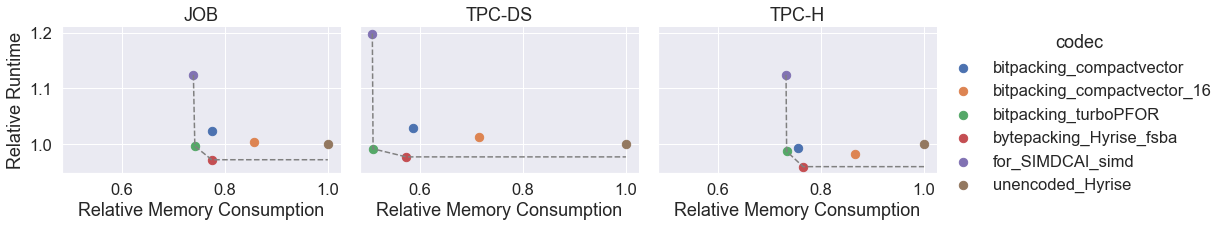

In [20]:
sns.set(font_scale=1.5)
data = all_benchmarks[~all_benchmarks["codec"].str.match(".*_seq")]
data = data[data["num_clients"] == 28]

data = data.merge(sizes_123, on=["codec", "benchmark"])

for b in data["benchmark"].unique():
    #print(b)
    df = data[data["benchmark"] == b]
    baseline_unencoded = df[df["codec"] == "unencoded_Hyrise"]
    #print(df)
    #print(baseline_unencoded)
    data.loc[data["benchmark"] == b,"relative_size"] = df["total_size"] / float(baseline_unencoded["total_size"])
    data.loc[data["benchmark"] == b,"relative_runtime_1"] = df["total_runtime"] / float(baseline_unencoded["total_runtime"])

#print(data)
data = data.sort_values(["benchmark","codec"])
g = sns.FacetGrid(data, col="benchmark", hue="codec", legend_out=True, height=3.5, aspect=1.3)
g.map(plt.scatter, "relative_size", "relative_runtime_1", s=70)
#g.map(plt.plot, "total_size", "total_runtime")
g.set_axis_labels("Relative Memory Consumption", "Relative Runtime")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend()

def pareto_frontier(Xs, Ys, maxX=False, maxY=False):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)
    
    return pareto_front

for ax in g.axes[0]:
    benchmark = ax.title.get_text()
    data_for_benchmark = data[data["benchmark"] == benchmark]
    x = list(data_for_benchmark["relative_size"])
    y = list(data_for_benchmark["relative_runtime_1"])
    par = pareto_frontier(x, y)
    par.append([max(x), par[-1][1]])
    ax.plot([p[0] for p in par], [p[1] for p in par], color="grey", linestyle="dashed")

#plt.setp(g._legend.get_title(), fontsize=14.5)
#plt.setp(g._legend.get_texts(), fontsize=14.5)
    #plt.setp(ax.get_legend().get_texts(), fontsize=22)  # for legend text
    #plt.setp(ax.get_legend().get_title(), fontsize=22)  # for legend title

plt.savefig(f"visualizations/pareto_multi.svg", format="svg")

In [21]:
data

codec  throughput  total_runtime benchmark  \
12     bitpacking_compactvector    0.110757   2.426735e+11       JOB   
13  bitpacking_compactvector_16    0.112999   2.382276e+11       JOB   
15         bitpacking_turboPFOR    0.113599   2.362562e+11       JOB   
17      bytepacking_Hyrise_fsba    0.116019   2.305019e+11       JOB   
14             for_SIMDCAI_simd    0.099494   2.664518e+11       JOB   
16             unencoded_Hyrise    0.113791   2.370280e+11       JOB   
6      bitpacking_compactvector    0.538483   5.144088e+10    TPC-DS   
7   bitpacking_compactvector_16    0.547803   5.063229e+10    TPC-DS   
9          bitpacking_turboPFOR    0.560060   4.956408e+10    TPC-DS   
11      bytepacking_Hyrise_fsba    0.568195   4.884397e+10    TPC-DS   
8              for_SIMDCAI_simd    0.460566   5.986166e+10    TPC-DS   
10             unencoded_Hyrise    0.555491   4.996506e+10    TPC-DS   
0      bitpacking_compactvector    0.450786   6.154712e+10     TPC-H   
1   bitpacking_compactvector_16    0.455742   6.095900e+10     TPC-H   
3          bitpacking_turboPFOR    0.453813   6.122328e+10     TPC-H   
5       bytepacking_Hyrise_fsba    0.466402   5.952697e+10     TPC-H   
2              for_SIMDCAI_simd    0.398147   6.969413e+10     TPC-H   
4              unencoded_Hyrise    0.448091   6.200093e+10     TPC-H   

    num_clients  relative_runtime  total_throughput  \
12           28          1.052805          3.101188   
13           28          1.033517          3.163985   
15           28          1.024964          3.180784   
17           28          1.000000          3.248546   
14           28          1.155964          2.785834   
16           28          1.028312          3.186154   
6            28          1.053168         15.077537   
7            28          1.036613         15.338496   
9            28          1.014743         15.681666   
11           28          1.000000         15.909461   
8            28          1.225569         12.895856   
10           28          1.022953         15.553756   
0            28          1.033937         12.622012   
1            28          1.024057         12.760779   
3            28          1.028496         12.706774   
5            28          1.000000         13.059258   
2            28          1.170799         11.148120   
4            28          1.041560         12.546540   

                                filename   total_size  int_col_sizes  \
12    sizes_bitpacking_compactvector.txt   6849373232     1913531024   
13  sizes_bitpacking_compactvector_f.txt   7576651048     2463914328   
15        sizes_bitpacking_turbopfor.txt   6560007039     1728761875   
17                  sizes_dictionary.txt   6850630005     1927429163   
14          sizes_bitpacking_simdcai.txt   6535579356     1707542400   
16        sizes_compressionUnencoded.txt   8841091748     3366120724   
6     sizes_bitpacking_compactvector.txt   6394814239     2901572456   
7   sizes_bitpacking_compactvector_f.txt   7790698559     4192303712   
9         sizes_bitpacking_turbopfor.txt   5555215297     2409291312   
11                  sizes_dictionary.txt   6257970805     3041190559   
8           sizes_bitpacking_simdcai.txt   5539812843     2394185376   
10        sizes_compressionUnencoded.txt  10902447315     6207424816   
0     sizes_bitpacking_compactvector.txt   9868210083     1445245248   
1   sizes_bitpacking_compactvector_f.txt  11316269827     1609638576   
3         sizes_bitpacking_turbopfor.txt   9582567033     1317708016   
5                   sizes_dictionary.txt   9999839546     1372782099   
2           sizes_bitpacking_simdcai.txt   9567344611     1315743428   
4         sizes_compressionUnencoded.txt  13063740127     2083656732   

    float_col_sizes  string_col_sizes  relative_size  relative_runtime_1  
12                0        4935842208       0.774720            1.023818  
13                0        5112736720       0.856981            1.005061  
15               

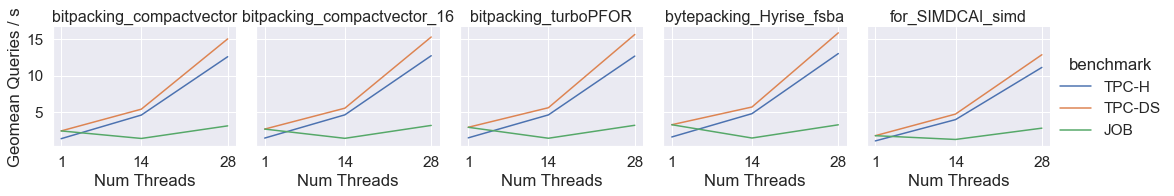

In [22]:
sns.set(font_scale=1.4)

g = sns.FacetGrid(all_benchmarks[~all_benchmarks.codec.str.match(".*(simdbp128_Hyrise|_seq|unencoded)")], col="codec", hue="benchmark", legend_out=True)
g.map(plt.plot, "num_clients", "total_throughput")
g.set_axis_labels("Num Threads", "Geomean Queries / s")
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=16)
g.add_legend()
for ax in g.axes[0]:
    ax.set_xticks([1, 14, 28])


plt.savefig(f"visualizations/colcompression_multithreading_speedup.svg", format="svg")

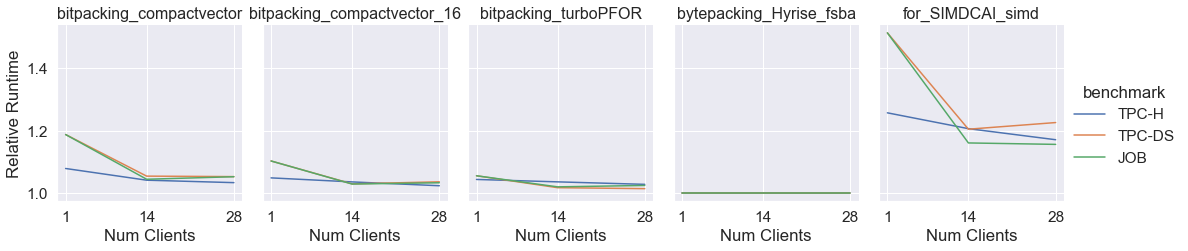

In [23]:

def plot_relative_runtimes(all_benchmarks, filter_="simdbp128_Hyrise|_seq|unencoded"):
    all_benchmarks = all_benchmarks.sort_values("codec")
    sns.set(font_scale=1.4)
    g = sns.FacetGrid(all_benchmarks[~all_benchmarks.codec.str.match(f".*({filter_})")], col="codec", hue="benchmark", legend_out=True, height=3.8, aspect=0.8)
    g.map(sns.lineplot, "num_clients", "relative_runtime")
    g.set_axis_labels("Num Clients", "Relative Runtime")
    g.set_titles(col_template="{col_name}", row_template="{row_name}", size=16)
    g.add_legend()
    for ax in g.axes[0]:
        ax.set_xticks(sorted(list(all_benchmarks.num_clients.unique())))


    plt.savefig(f"visualizations/colcompression_multithreading.svg", format="svg")

plot_relative_runtimes(all_benchmarks)

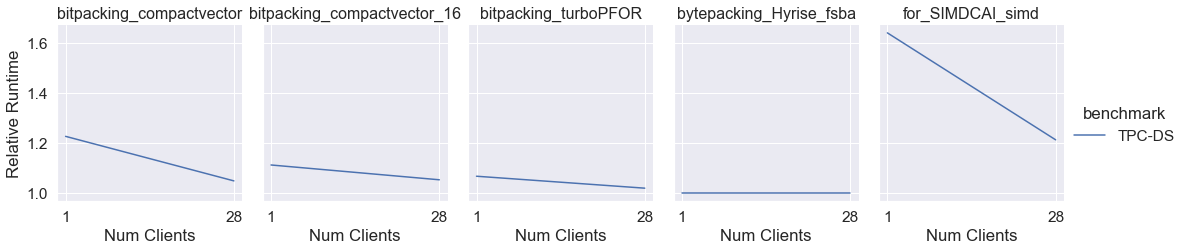

In [24]:
plot_relative_runtimes(pd.concat([tpch_cache_single, tpch_cache_multi]))

In [25]:
events = ["l2_rqsts.all_demand_data_rd", "l2_rqsts.demand_data_rd_hit", "l2_rqsts.demand_data_rd_miss", "LLC-loads", "LLC-load-misses", "LLC-stores", "LLC-store-misses"]

def load_perf_file(filename):
    with open(filename, "r") as f:
        lines = f.readlines()
        props = {}
        for line in lines:
            for event in events:
                if event in line:
                    entries = [e for e in line.split(" ") if e != ""]
                    props[event] = [float(entries[0].strip())]
        return pd.DataFrame(props)


load_perf_file("../data/cache_results_3/cache/baseline/bitpacking_compactvector_baseline_sf3_multi.txt")

l2_rqsts.all_demand_data_rd  l2_rqsts.demand_data_rd_hit  \
0                 3.442146e+09                 2.452218e+09   

   l2_rqsts.demand_data_rd_miss     LLC-loads  LLC-load-misses   LLC-stores  \
0                   994578079.0  1.079652e+09      255261777.0  446308638.0   

   LLC-store-misses  
0       244789891.0

In [26]:
def read_perf_files(file_dir):

    perf_files = []

    for file in os.listdir(f"{cache_path_str}/cache/{file_dir}"):
            filename = os.fsdecode(file)
            if filename.endswith(".txt"):
                p = Path(cache_path_str) / "cache" / file_dir / filename
                
                r = load_perf_file(str(p))
                #r["filename"] = filename
                r["codec"] = map_benchmark_name(filename.split(f"_{file_dir}")[0])
                mode = filename.split("sf3_")[1][:-4]
                r["num_clients"] = 28 if mode == "multi" else 1
                perf_files.append(r)

    all_perf_files = pd.concat(perf_files, ignore_index=True)
    return all_perf_files



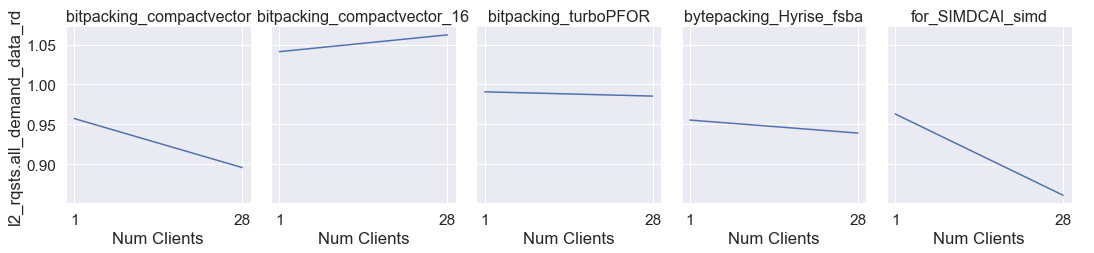

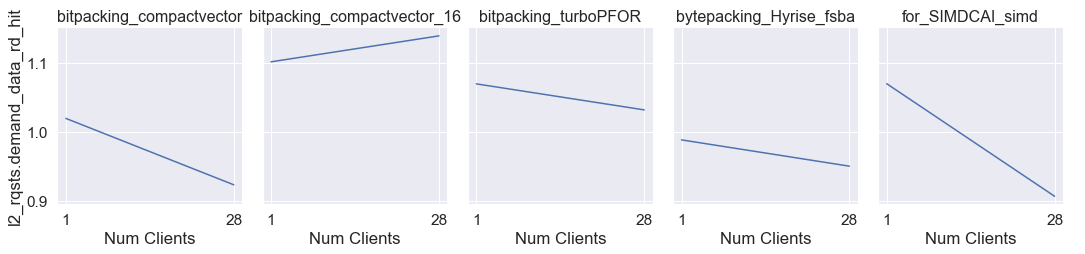

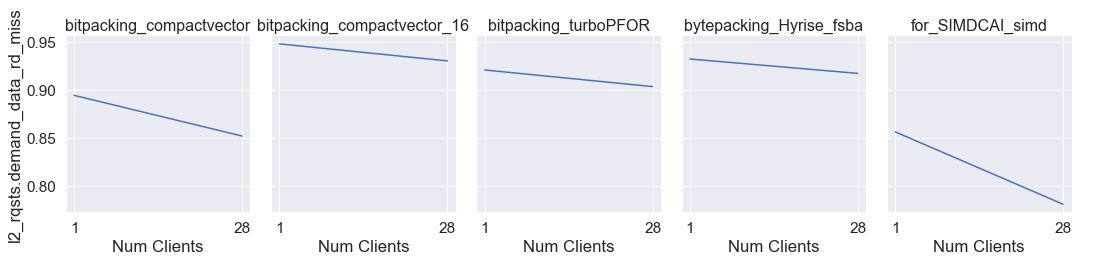

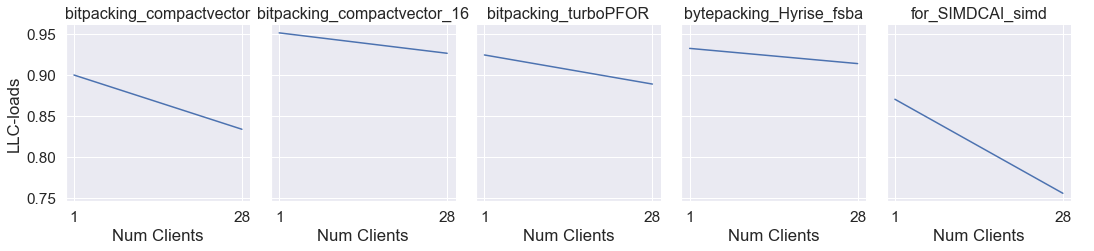

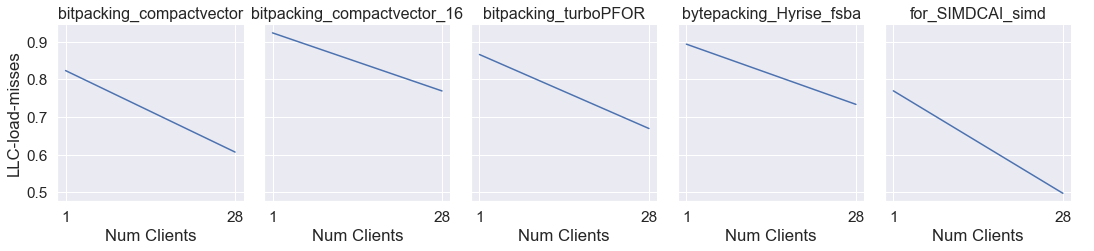

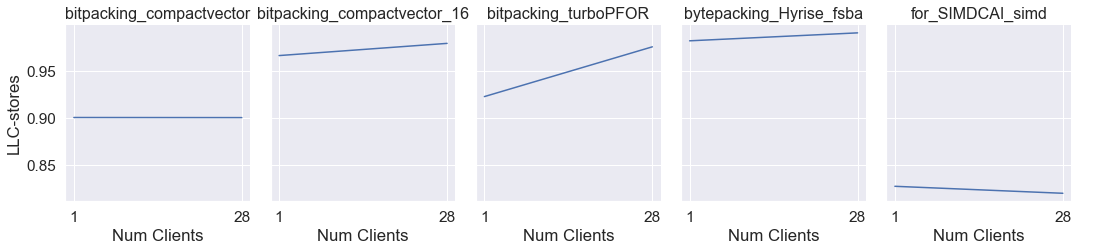

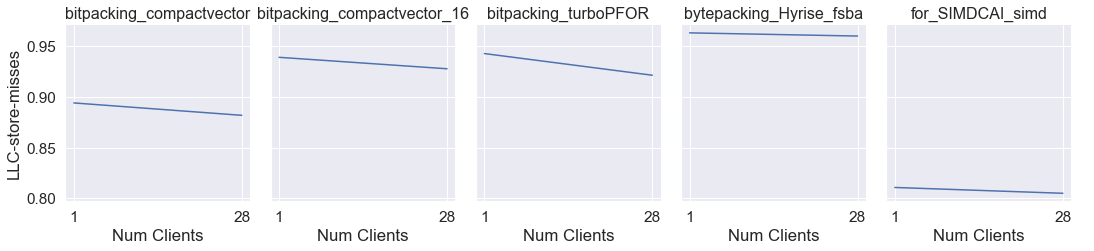

In [27]:
pd.options.mode.chained_assignment = None 
def plot_relative_cache(all_benchmarks, event, filter_="simdbp128_Hyrise|_seq|unencoded"):
    all_benchmarks = all_benchmarks.sort_values("codec")
    sns.set(font_scale=1.4)
    g = sns.FacetGrid(all_benchmarks[~all_benchmarks.codec.str.match(f".*({filter_})")], col="codec", legend_out=True, height=3.8, aspect=0.8)
    g.map(sns.lineplot, "num_clients", f"{event}_relative")
    g.set_axis_labels("Num Clients", event)
    g.set_titles(col_template="{col_name}", row_template="{row_name}", size=16)
    g.add_legend()
    for ax in g.axes[0]:
        ax.set_xticks([1, 28])

    plt.show()
    #plt.savefig(f"visualizations/colcompression_multithreading.svg", format="svg")

def plot_all_relative_cache(all_cache_measurements, baseline_codec_name, filter_="simdbp128_Hyrise|_seq|unencoded"):
    
    
    all_cache_measurements_1_list = []
    for n in all_cache_measurements.num_clients.unique():
        c = all_cache_measurements[all_cache_measurements["num_clients"] == n]
        c_baseline = c[c["codec"] == baseline_codec_name]
        for e in events:
            c[f"{e}_relative"] = c[e] / c_baseline[e].values[0]
        all_cache_measurements_1_list.append(c)

    all_cache_measurements_1 = pd.concat(all_cache_measurements_1_list, ignore_index=True)
    all_cache_measurements_1

    for e in events:
        plot_relative_cache(all_cache_measurements_1, e, filter_)

all_cache = read_perf_files("cache")

all_baselines = read_perf_files("baseline")

all_cache_measurements = all_cache.merge(all_baselines, on=["codec", "num_clients"])
for e in events:
    all_cache_measurements[e] = all_cache_measurements[f"{e}_x"] - all_cache_measurements[f"{e}_y"]

plot_all_relative_cache(all_cache_measurements, "unencoded_Hyrise")


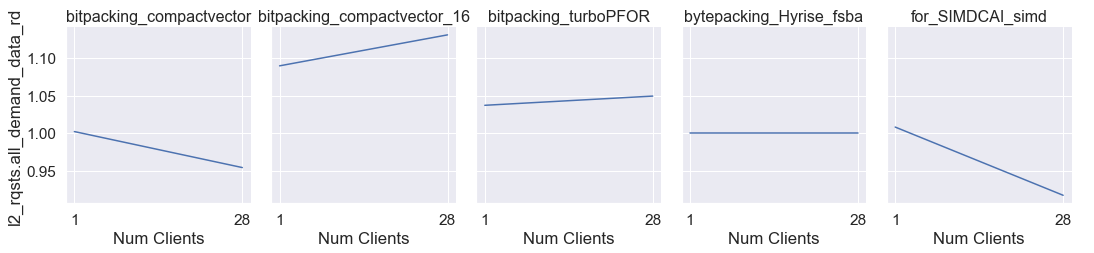

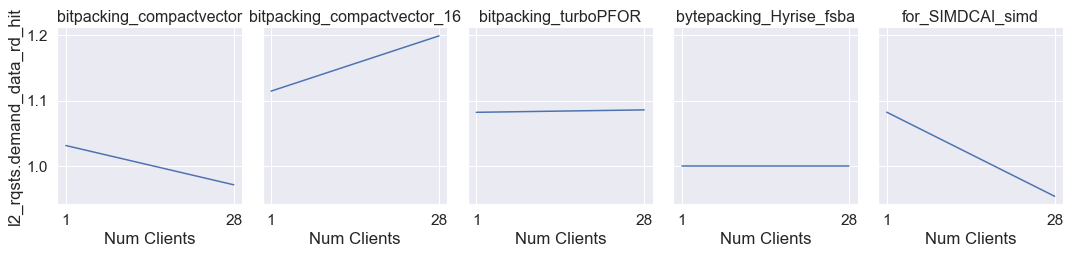

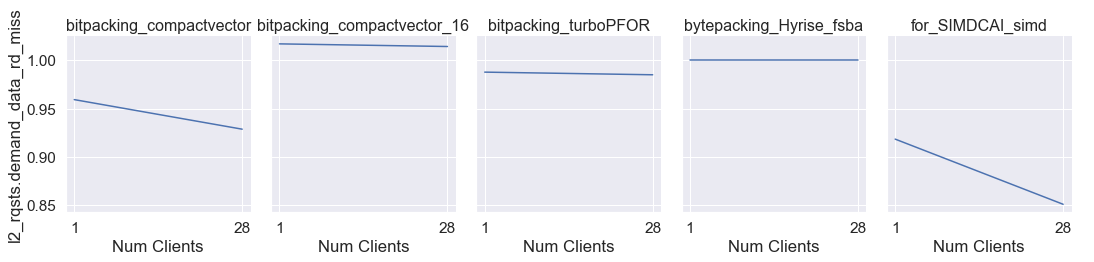

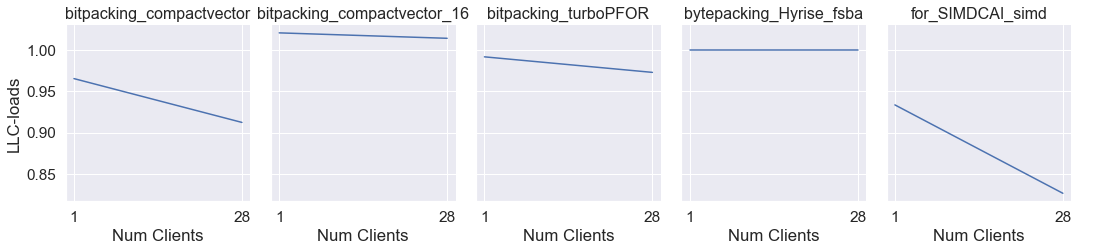

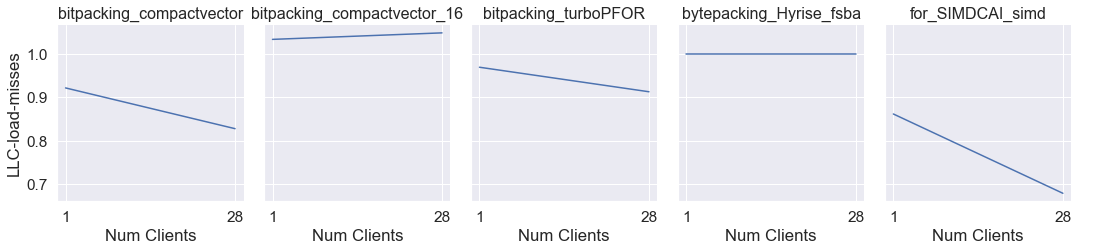

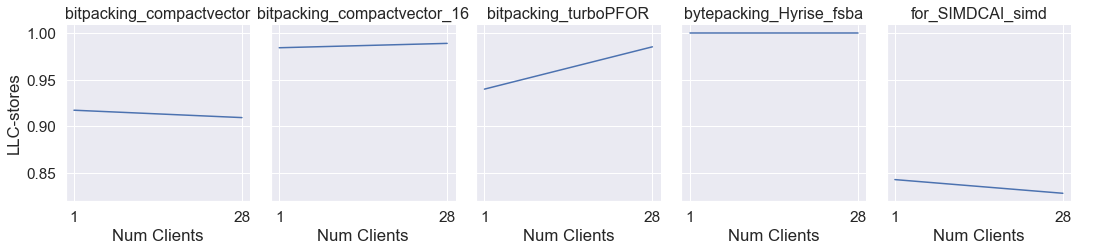

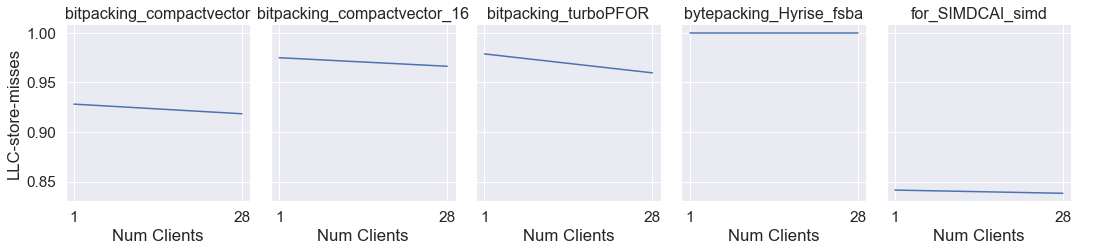

In [28]:
plot_all_relative_cache(all_cache_measurements, "bytepacking_Hyrise_fsba")

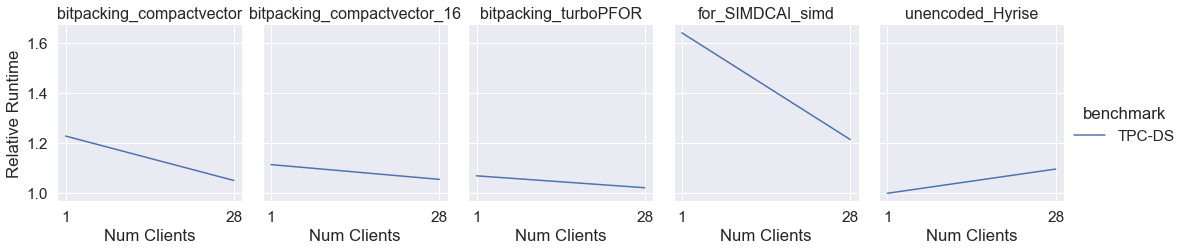

In [29]:
plot_relative_runtimes(pd.concat([tpch_cache_single, tpch_cache_multi]), "bytepacking_Hyrise_fsba")

In [30]:
#all_cache_measurements = pd.concat([tpch_cache_single, tpch_cache_multi])
all_cache_measurements

l2_rqsts.all_demand_data_rd_x  l2_rqsts.demand_data_rd_hit_x  \
0                    6.999643e+09                   4.357316e+09   
1                    2.630692e+10                   1.705419e+10   
2                    2.735059e+10                   1.749763e+10   
3                    7.343873e+09                   4.710408e+09   
4                    7.041271e+09                   4.569911e+09   
5                    2.855684e+10                   1.879741e+10   
6                    6.871156e+09                   4.422075e+09   
7                    6.836829e+09                   4.338857e+09   
8                    6.912146e+09                   4.540500e+09   
9                    2.891624e+10                   1.825966e+10   
10                   2.540336e+10                   1.683538e+10   
11                   3.063047e+10                   2.056517e+10   

    l2_rqsts.demand_data_rd_miss_x   LLC-loads_x  LLC-load-misses_x  \
0                     2.653909e+09  2.906380e+09       9.447059e+08   
1                     9.299388e+09  1.098165e+10       1.412668e+09   
2                     9.859349e+09  1.183050e+10       1.623615e+09   
3                     2.573111e+09  2.830151e+09       8.881683e+08   
4                     2.486321e+09  2.735223e+09       8.470173e+08   
5                     9.733992e+09  1.156463e+10       1.528317e+09   
6                     2.463663e+09  2.721943e+09       8.104149e+08   
7                     2.500165e+09  2.731808e+09       8.453721e+08   
8                     2.374956e+09  2.628162e+09       7.706600e+08   
9                     1.069482e+10  1.289529e+10       2.159183e+09   
10                    8.537149e+09  9.970208e+09       1.189231e+09   
11                    1.005022e+10  1.207081e+10       1.727554e+09   

    LLC-stores_x  LLC-store-misses_x                        codec  \
0   2.564488e+09        1.529156e+09             unencoded_Hyrise   
1   1.105641e+10        3.606673e+09     bitpacking_compactvector   
2   1.205633e+10        3.868116e+09      bytepacking_Hyrise_fsba   
3   2.478740e+09        1.449700e+09  bitpacking_compactvector_16   
4   2.418080e+09        1.475223e+09         bitpacking_turboPFOR   
5   1.193811e+10        3.774960e+09         bitpacking_turboPFOR   
6   2.348370e+09        1.387817e+09     bitpacking_compactvector   
7   2.452583e+09        1.446039e+09      bytepacking_Hyrise_fsba   
8   2.250204e+09        1.340585e+09             for_SIMDCAI_simd   
9   1.224508e+10        4.067963e+09             unencoded_Hyrise   
10  1.018029e+10        3.379897e+09             for_SIMDCAI_simd   
11  1.196632e+10        3.774116e+09  bitpacking_compactvector_16   

    num_clients  l2_rqsts.all_demand_data_rd_y  ...  LLC-load-misses_y  \
0             1                   3.182511e+09  ...        221637331.0   
1            28                   3.442146e+09  ...        255261777.0   
2            28                   3.381998e+09  ...        224910554.0   
3             1                   3.369557e+09  ...        220222850.0   
4             1                   3.259124e+09  ...        220610132.0   
5            28                   3.404587e+09  ...        251775121.0   
6             1                   3.216907e+09  ...        214863848.0   
7             1                   3.189902e+09  ...        199099238.0   
8             1                   3.236004e+09  ...        213972639.0   
9            28                   3.393189e+09  ...        253424814.0   
10           28                   3.425699e+09  ...        240345447.0   
11           28                   3.519010e+09  ...        260937984.0   

    LLC-stores_y  LLC-store-misses_y  l2_rqsts.all_demand_data_rd  \
0    420635433.0         242689380.0                 3.817132e+09   
1    446308638.0         244789891.0                 2.286477e+10   
2    390170386.0         207559105.0                 2.396859e+10   
3    407989285.0         241351845.0                 3.974

In [31]:
def read_pcm_file(filename, codec):
    memory_stats = []

    with open(filename, "r") as f:
        lines = f.readlines()
        memory_lines = [lines[i+2] for i in range(len(lines)) if lines[i].startswith("MEM (GB)->|  READ |  WRITE")]
        memory_stats = []
        i = 0
        for l in memory_lines:
            entries = l.split(" ")
            entries = [e for e in entries if e != ""]
            memory_stats.append((float(entries[2]), float(entries[3]), i))
            i += 1
                
        d = pd.DataFrame(memory_stats, columns=["read", "write", "timestamp"])
        d["codec"] = codec
        return d

pcm_bitpacking_simdcai = read_pcm_file("../data/pcm/1.txt", "for_SIMDCAI_simd")
pcm_unencodedHyrise = read_pcm_file("../data/pcm/2.txt", "unencoded_Hyrise")
#pcm_bitpacking_simdcai_32 = read_pcm_file("../data/pcm/tpcds_bitpacking_simdcai_clients_32.txt", "for_SIMDCAI_simd_32")
#pcm_unencodedHyrise_32 = read_pcm_file("../data/pcm/tpcds_compressionUnencoded_clients_32.txt", "unencoded_Hyrise_32")
pcm_turbpfor = read_pcm_file("../data/pcm/turbopfor_bitpacking.txt", "bitpacking_turboPFOR")
pcm_fsba = read_pcm_file("../data/pcm/fsba.txt", "bytepacking_Hyrise_fsba")
pcm_compact = read_pcm_file("../data/pcm/bitpacking_compactvector.txt", "bitpacking_compactvector")
pcm_compact_f = read_pcm_file("../data/pcm/bitpacking_compactvector_fixed.txt", "bitpacking_compactvector_16")
pcm_all_1 = [pcm_bitpacking_simdcai, pcm_unencodedHyrise, pcm_turbpfor, pcm_fsba, pcm_compact, pcm_compact_f]
pcm_all = pd.concat(pcm_all_1)

pcm_all["num_clients"] = 28
pcm_all["Variable"] = "Memory Bandwidth"
pcm_all["read"] = 10**9 * pcm_all["read"]

pcm_grouped = pcm_all.groupby("codec", as_index=False)["read"].mean()

pcm_all_tidy = pd.DataFrame({"Codec": pcm_grouped["codec"], "Num_Clients": 28, "Variable": "Mem Bandwidth (Byte / s)", "Value": pcm_grouped["read"]})

pcm_all_tidy

Codec  Num_Clients                  Variable  \
0     bitpacking_compactvector           28  Mem Bandwidth (Byte / s)   
1  bitpacking_compactvector_16           28  Mem Bandwidth (Byte / s)   
2         bitpacking_turboPFOR           28  Mem Bandwidth (Byte / s)   
3      bytepacking_Hyrise_fsba           28  Mem Bandwidth (Byte / s)   
4             for_SIMDCAI_simd           28  Mem Bandwidth (Byte / s)   
5             unencoded_Hyrise           28  Mem Bandwidth (Byte / s)   

          Value  
0  1.939410e+10  
1  2.048623e+10  
2  2.125960e+10  
3  2.142233e+10  
4  2.018337e+10  
5  2.188772e+10

In [101]:
high_level_cache_tpcds = pd.read_csv(f"../data/cache_results_3/tpch_shuffled/benchmarks_parsed_high_level.csv")
high_level_cache_tpcds = high_level_cache_tpcds.sort_values("benchmark_run_name")
#high_level_cache_tpcds = high_level_cache_tpcds[~high_level_cache_tpcds["benchmark_run_name"].str.match(".*simdbp.*")]
high_level_cache_tpcds["fancy_name"] = [fancy_name(b) for b in high_level_cache_tpcds["benchmark_run_name"]]
high_level_cache_tpcds["codec_name"] = ["_".join(b.split("_")[:len(b.split("_")) - 2])[2:] for b in high_level_cache_tpcds["fancy_name"]]
high_level_cache_tpcds["num_clients"] = [int(b.split("_")[len(b.split("_")) - 2]) for b in high_level_cache_tpcds["fancy_name"]]
high_level_cache_tpcds = high_level_cache_tpcds.sort_values("num_clients")
high_level_cache_tpcds["Codec"] = high_level_cache_tpcds["codec_name"]
high_level_cache_tpcds["Value"] = high_level_cache_tpcds["total_runtime"]
high_level_cache_tpcds["Event"] = "Runtime (ns)"
high_level_cache_tpcds

benchmark_run_name  total_runtime  \
2   ./tpch_bitpacking_compactvector_28_shuffled.json   1.995697e+10   
5  ./tpch_bitpacking_compactvector_f_28_shuffled....   2.004067e+10   
0         ./tpch_bitpacking_simdcai_28_shuffled.json   2.308354e+10   
1       ./tpch_bitpacking_turbopfor_28_shuffled.json   1.940204e+10   
4       ./tpch_compressionUnencoded_28_shuffled.json   2.082751e+10   
3                 ./tpch_dictionary_28_shuffled.json   1.901286e+10   

   avg_throughput                                 fancy_name  \
2        0.726632     ./bitpacking_compactvector_28_shuffled   
5        0.746845  ./bitpacking_compactvector_16_28_shuffled   
0        0.650963             ./for_SIMDCAI_simd_28_shuffled   
1        0.759741         ./bitpacking_turboPFOR_28_shuffled   
4        0.713652             ./unencoded_Hyrise_28_shuffled   
3        0.774415      ./bytepacking_Hyrise_fsba_28_shuffled   

                    codec_name  num_clients                        Codec  \
2     bitpacking_compactvector           28     bitpacking_compactvector   
5  bitpacking_compactvector_16           28  bitpacking_compactvector_16   
0             for_SIMDCAI_simd           28             for_SIMDCAI_simd   
1         bitpacking_turboPFOR           28         bitpacking_turboPFOR   
4             unencoded_Hyrise           28             unencoded_Hyrise   
3      bytepacking_Hyrise_fsba           28      bytepacking_Hyrise_fsba   

          Value         Event  
2  1.995697e+10  Runtime (ns)  
5  2.004067e+10  Runtime (ns)  
0  2.308354e+10  Runtime (ns)  
1  1.940204e+10  Runtime (ns)  
4  2.082751e+10  Runtime (ns)  
3  1.901286e+10  Runtime (ns)

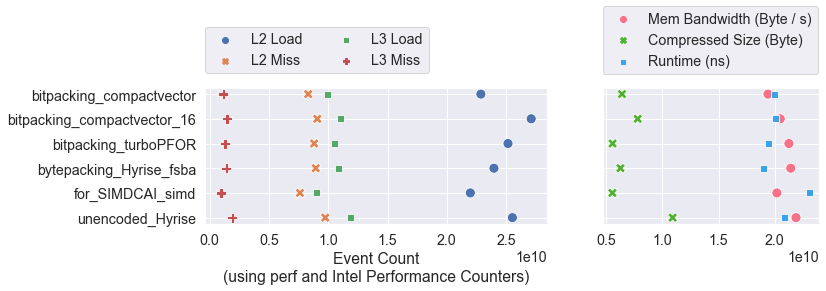

In [111]:
sns.set(rc={'figure.figsize':(11,2.5)})
sns.set(font_scale=1.3)

tidy = all_cache_measurements.melt(id_vars=['codec', "num_clients"]).rename(columns=str.title)
tidy = tidy[tidy["Variable"].str.match(f".*(LLC-load-misses|LLC-loads|l2_rqsts.all_demand_data_rd|l2_rqsts.demand_data_rd_miss)$")]

#print(tidy)

tidy = pd.concat([tidy, pcm_all_tidy], ignore_index=True)

tidy["Variable + NumClients"] = [t + " " + str(v) for t,v in zip(tidy["Variable"], tidy["Num_Clients"])]
#tidy.loc[(tidy["Variable"] == "l2_rqsts.all_demand_data_rd") & (tidy["Num_Clients"] == 28), "Value"] /= 28
tidy = tidy[tidy["Num_Clients"] == 28]

def mapName(n):
    return n.replace("LLC-load-misses", "L3 Miss").replace("LLC-loads", "L3 Load").replace("l2_rqsts.all_demand_data_rd", "L2 Load").replace("l2_rqsts.demand_data_rd_miss", "L2 Miss")

tidy["Event"] = [mapName(n) for n in tidy["Variable"]]
tidy = tidy.sort_values(["Codec", "Event"])

def map_codec_newline(c):
    return c.replace("_", "_\n")


sizes_tpcds = sizes_123[sizes_123["benchmark"] == "TPC-DS"]
sizes_tpcds = sizes_tpcds[~sizes_tpcds["codec"].str.match(".*(_seq|simdbp).*")]
sizes_tpcds = sizes_tpcds.sort_values("codec")
sizes_tpcds["Value"] = sizes_tpcds["total_size"]
sizes_tpcds["Codec"] = sizes_tpcds["codec"]
sizes_tpcds["Event"] = "Compressed Size (Byte)"

tidy = pd.concat([tidy, sizes_tpcds, high_level_cache_tpcds])

#tidy["Codec"] = [map_codec_newline(c) for c in tidy["Codec"]]
tidy["cache_plot"] = tidy["Event"].str.match(".*(Load|Miss)")

#g = sns.FacetGrid(tidy, col="cache_plot", height=3, aspect=2)
#plot = sns.scatterplot(data=tidy, y="Codec", x="Value", hue="Event", s=100)
#plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

fig, ax = plt.subplots(1,2, sharey=True, gridspec_kw={'width_ratios': [2, 1.27]})
sns.scatterplot(data=tidy[tidy["cache_plot"]], y="Codec", x="Value", hue="Event", s=100, ax=ax[0], style="Event")
sns.scatterplot(data=tidy[~tidy["cache_plot"]], y="Codec", x="Value", hue="Event", s=100, ax=ax[1], style="Event", palette="husl")
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_xlabel("Event Count\n(using perf and Intel Performance Counters)")
ax[1].set_xlabel("")
ax[0].legend(bbox_to_anchor=(0., 1.45), loc=2, borderaxespad=0., ncol = 2)
ax[1].legend(bbox_to_anchor=(0., 1.6), loc=2, borderaxespad=0., ncol = 1)

#plt.xticks(rotation=90)
#plt.tight_layout()
#plt.gcf().subplots_adjust(bottom=0.5)
plt.savefig("visualizations/cache_bandwidth_size.pdf", format="pdf", bbox_inches = "tight")


In [53]:
tidy
print("a")

a


<AxesSubplot:xlabel='Codec', ylabel='Value'>

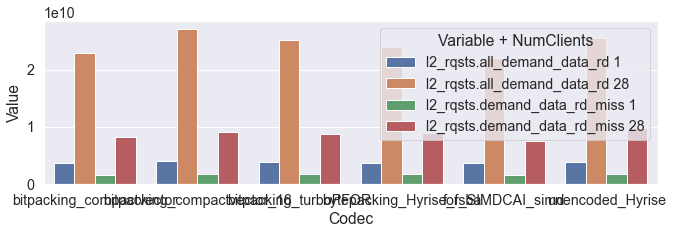

In [33]:
tidy = all_cache_measurements.melt(id_vars=['codec', "num_clients"]).rename(columns=str.title)
tidy = tidy[tidy["Variable"].str.match(f".*(l2_rqsts.all_demand_data_rd|l2_rqsts.demand_data_rd_miss)$")]
tidy["Variable + NumClients"] = [t + " " + str(v) for t,v in zip(tidy["Variable"], tidy["Num_Clients"])]
tidy = tidy.sort_values(["Codec", "Variable + NumClients"])
#tidy.loc[(tidy["Variable"] == "l2_rqsts.all_demand_data_rd") & (tidy["Num_Clients"] == 28), "Value"] /= 28
sns.barplot(data=tidy, x="Codec", y="Value", hue="Variable + NumClients")

In [34]:
tidy = all_cache_measurements.melt(id_vars=['codec', "num_clients"]).rename(columns=str.title)
tidy["Variable + NumClients"] = [t + " " + str(v) for t,v in zip(tidy["Variable"], tidy["Num_Clients"])]

misses = tidy[tidy["Variable"] == "LLC-load-misses"]
loads = tidy[tidy["Variable"] == "LLC-loads"]


misses = misses.merge(loads, on=["Codec", "Num_Clients"])
misses["miss_rates"] = misses["Value_x"] / misses["Value_y"]
misses

Codec  Num_Clients       Variable_x       Value_x  \
0              unencoded_Hyrise            1  LLC-load-misses  7.230686e+08   
1      bitpacking_compactvector           28  LLC-load-misses  1.157406e+09   
2       bytepacking_Hyrise_fsba           28  LLC-load-misses  1.398704e+09   
3   bitpacking_compactvector_16            1  LLC-load-misses  6.679454e+08   
4          bitpacking_turboPFOR            1  LLC-load-misses  6.264072e+08   
5          bitpacking_turboPFOR           28  LLC-load-misses  1.276542e+09   
6      bitpacking_compactvector            1  LLC-load-misses  5.955511e+08   
7       bytepacking_Hyrise_fsba            1  LLC-load-misses  6.462728e+08   
8              for_SIMDCAI_simd            1  LLC-load-misses  5.566873e+08   
9              unencoded_Hyrise           28  LLC-load-misses  1.905758e+09   
10             for_SIMDCAI_simd           28  LLC-load-misses  9.488852e+08   
11  bitpacking_compactvector_16           28  LLC-load-misses  1.466616e+09   

   Variable + NumClients_x Variable_y       Value_y Variable + NumClients_y  \
0        LLC-load-misses 1  LLC-loads  2.031482e+09             LLC-loads 1   
1       LLC-load-misses 28  LLC-loads  9.901994e+09            LLC-loads 28   
2       LLC-load-misses 28  LLC-loads  1.085509e+10            LLC-loads 28   
3        LLC-load-misses 1  LLC-loads  1.933444e+09             LLC-loads 1   
4        LLC-load-misses 1  LLC-loads  1.878600e+09             LLC-loads 1   
5       LLC-load-misses 28  LLC-loads  1.055790e+10            LLC-loads 28   
6        LLC-load-misses 1  LLC-loads  1.828787e+09             LLC-loads 1   
7        LLC-load-misses 1  LLC-loads  1.894911e+09             LLC-loads 1   
8        LLC-load-misses 1  LLC-loads  1.768628e+09             LLC-loads 1   
9       LLC-load-misses 28  LLC-loads  1.187388e+10            LLC-loads 28   
10      LLC-load-misses 28  LLC-loads  8.973075e+09            LLC-loads 28   
11      LLC-load-misses 28  LLC-loads  1.100465e+10            LLC-loads 28   

    miss_rates  
0     0.355932  
1     0.116886  
2     0.128852  
3     0.345469  
4     0.333444  
5     0.120909  
6     0.325654  
7     0.341057  
8     0.314757  
9     0.160500  
10    0.105748  
11    0.133272

<AxesSubplot:xlabel='Codec', ylabel='miss_rates'>

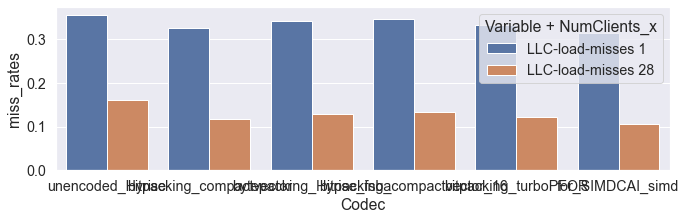

In [35]:
sns.barplot(data=misses, x="Codec", y="miss_rates", hue="Variable + NumClients_x")


In [36]:
all_cache_measurements[all_cache_measurements.num_clients == 28]

l2_rqsts.all_demand_data_rd_x  l2_rqsts.demand_data_rd_hit_x  \
1                    2.630692e+10                   1.705419e+10   
2                    2.735059e+10                   1.749763e+10   
5                    2.855684e+10                   1.879741e+10   
9                    2.891624e+10                   1.825966e+10   
10                   2.540336e+10                   1.683538e+10   
11                   3.063047e+10                   2.056517e+10   

    l2_rqsts.demand_data_rd_miss_x   LLC-loads_x  LLC-load-misses_x  \
1                     9.299388e+09  1.098165e+10       1.412668e+09   
2                     9.859349e+09  1.183050e+10       1.623615e+09   
5                     9.733992e+09  1.156463e+10       1.528317e+09   
9                     1.069482e+10  1.289529e+10       2.159183e+09   
10                    8.537149e+09  9.970208e+09       1.189231e+09   
11                    1.005022e+10  1.207081e+10       1.727554e+09   

    LLC-stores_x  LLC-store-misses_x                        codec  \
1   1.105641e+10        3.606673e+09     bitpacking_compactvector   
2   1.205633e+10        3.868116e+09      bytepacking_Hyrise_fsba   
5   1.193811e+10        3.774960e+09         bitpacking_turboPFOR   
9   1.224508e+10        4.067963e+09             unencoded_Hyrise   
10  1.018029e+10        3.379897e+09             for_SIMDCAI_simd   
11  1.196632e+10        3.774116e+09  bitpacking_compactvector_16   

    num_clients  l2_rqsts.all_demand_data_rd_y  ...  LLC-load-misses_y  \
1            28                   3.442146e+09  ...        255261777.0   
2            28                   3.381998e+09  ...        224910554.0   
5            28                   3.404587e+09  ...        251775121.0   
9            28                   3.393189e+09  ...        253424814.0   
10           28                   3.425699e+09  ...        240345447.0   
11           28                   3.519010e+09  ...        260937984.0   

    LLC-stores_y  LLC-store-misses_y  l2_rqsts.all_demand_data_rd  \
1    446308638.0         244789891.0                 2.286477e+10   
2    390170386.0         207559105.0                 2.396859e+10   
5    445868963.0         262032029.0                 2.515225e+10   
9    459992684.0         256073094.0                 2.552305e+10   
10   513530003.0         311673908.0                 2.197766e+10   
11   431148500.0         236842409.0                 2.711146e+10   

    l2_rqsts.demand_data_rd_hit  l2_rqsts.demand_data_rd_miss     LLC-loads  \
1                  1.460197e+10                  8.304810e+09  9.901994e+09   
2                  1.502964e+10                  8.942252e+09  1.085509e+10   
5                  1.632171e+10                  8.807917e+09  1.055790e+10   
9                  1.581304e+10                  9.744316e+09  1.187388e+10   
10                 1.433854e+10                  7.610430e+09  8.973075e+09   
11                 1.802068e+10                  9.069304e+09  1.100465e+10   

    LLC-load-misses    LLC-stores  LLC-store-misses  
1      1.157406e+09  1.061010e+10      3.361883e+09  
2      1.398704e+09  1.166616e+10      3.660557e+09  
5      1.276542e+09  1.149224e+10      3.512928e+09  
9      1.905758e+09  1.178508e+10      3.811890e+09  
10     9.488852e+08  9.666763e+09      3.068224e+09  
11     1.466616e+09  1.153517e+10      3.537274e+09  

[6 rows x 23 columns]

In [37]:
events

['l2_rqsts.all_demand_data_rd',
 'l2_rqsts.demand_data_rd_hit',
 'l2_rqsts.demand_data_rd_miss',
 'LLC-loads',
 'LLC-load-misses',
 'LLC-stores',
 'LLC-store-misses']

In [38]:
for p in pcm_all_1:
    print(p.read.mean(), p.write.mean())

20.183371069182392 6.639345911949685
21.887723214285717 6.865725446428572
21.25960079840319 7.064730538922157
21.422327935222672 7.093562753036437
19.394099999999998 7.7522
20.486231155778896 7.927236180904522


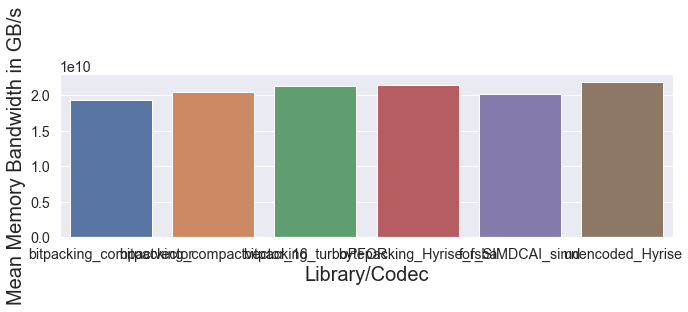

In [39]:
def plot_pcm(pcm_all):
    pcm_all = pcm_all.sort_values("codec")
    pcm_grouped = pcm_all.groupby("codec", as_index=False)["read"].mean()
    plot = sns.barplot(data=pcm_grouped, x="codec", y="read")
    plot.set_xlabel("Library/Codec",fontsize=20)
    plot.set_ylabel("Mean Memory Bandwidth in GB/s",fontsize=20) 
plot_pcm(pcm_all)
        

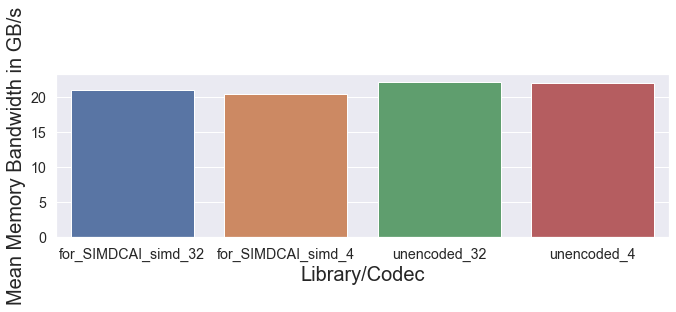

In [40]:
simdcai_1 = read_pcm_file("../data/pcm/tpch_bitpacking_simdcai_clients_32.txt", "for_SIMDCAI_simd_32")
simdcai_2 = read_pcm_file("../data/pcm/tpch_bitpacking_simdcai_sf4.txt", "for_SIMDCAI_simd_4")

unencoded_1 = read_pcm_file("../data/pcm/tpch_compressionUnencoded_clients_32.txt", "unencoded_32")
unencoded_2 = read_pcm_file("../data/pcm/tpch_compressionUnencoded_4.txt", "unencoded_4")
pcm_all_13 = [simdcai_1, simdcai_2, unencoded_1, unencoded_2]
plot_pcm(pd.concat(pcm_all_13))

<AxesSubplot:xlabel='timestamp', ylabel='read'>

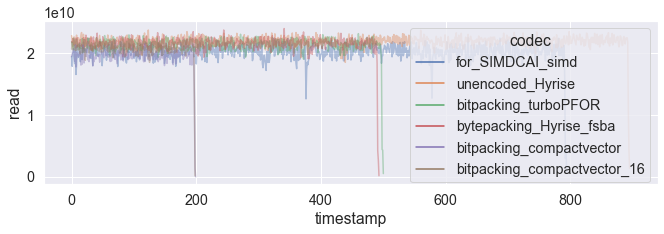

In [41]:
sns.lineplot(data=pcm_all, x="timestamp", y="read", hue="codec", alpha=0.4)